<font size="12">Predição de Expectativa de Vida</font>

# <font size="12">1 - Introdução</font>

O objetivo deste trabalho é prever a expectativa de vida da população com base em fatores
econômicos, sociais e de saúde.

# <font size="12">2 - Importando as bibliotecas</font>

In [625]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

# <font size="12">3 - Lendo os dados e realizando a limpeza na base</font>

### 3.1 - Lendo e entendendo o as colunas do dataset e seu comportamento

In [626]:
data = pd.read_csv("C:\\Users\\DenteMortal\\Desktop\\PythonExe\\Life Expectancy Data.csv")

In [627]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [628]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### 3.2 - Ajustando nomes das variáveis e estudando dados faltantes

Aqui vamos verificar a quantidade de dados faltantes em cada variável

In [629]:
print(data.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [630]:
data.shape

(2938, 22)

In [631]:
# Verificando se existem dados duplicados na base

data.duplicated().any()

False

In [632]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Alguns nomes de células têm espaços no final ou são compostos por dois nomes separados. Vou corrigir isso e impor um esquema de nomenclatura mais consistente


In [633]:
# Renomeando as colunas
data.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Total_Exp"}, inplace=True)
data.head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,Measles,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1to19_years,thinness_5to9_years,Income_Comp_Of_Resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [634]:
# Identificando a porcentagem de valores nulos em cada coluna.
data.isnull().sum()*100/data.isnull().count()

Country                      0.000000
Year                         0.000000
Status                       0.000000
Life_Expectancy              0.340368
Adult_Mortality              0.340368
Infant_Deaths                0.000000
Alcohol                      6.603131
Percentage_Exp               0.000000
HepatitisB                  18.822328
Measles                      0.000000
BMI                          1.157250
Under_Five_Deaths            0.000000
Polio                        0.646698
Total_Exp                    7.692308
Diphtheria                   0.646698
HIV/AIDS                     0.000000
GDP                         15.248468
Population                  22.191967
thinness_1to19_years         1.157250
thinness_5to9_years          1.157250
Income_Comp_Of_Resources     5.684139
Schooling                    5.547992
dtype: float64

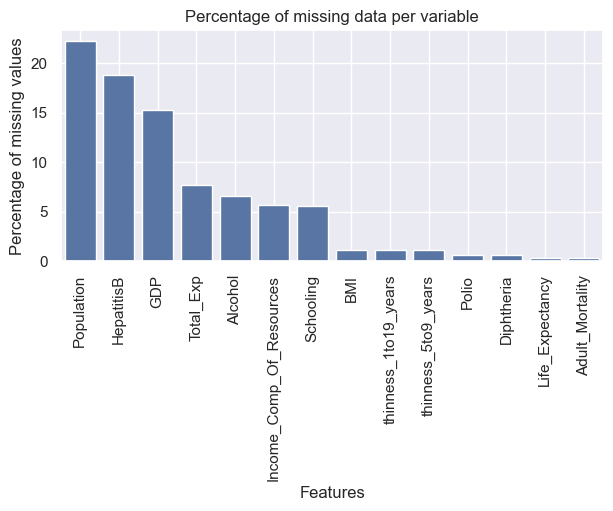

In [635]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]

fig, ax = plt.subplots(figsize=(7, 3))

sns.barplot(x = data_na.index, y=data_na, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set(xlabel='Features', ylabel='Percentage of missing values',
       title='Percentage of missing data per variable')
ax.grid(True)

plt.show()

### 3.2 - Dividindo a base em treino e teste antes de realizar o tratamento

É muito importante que seja feita a divisão antes de qualquer alteração nas variáveis

In [636]:
# import need function
from sklearn.model_selection import train_test_split

# spliting data to train and test using train_test_split with 80% of train data and 20% of test data
train, test =  train_test_split(data, test_size = 0.2, random_state = 42)

In [637]:
# verificando o tamanho resultante de cada base
print(f"Shape of train data is : {train.shape}")
print("-" * 30)
print(f"Shape of test data is : {test.shape}")

Shape of train data is : (2350, 22)
------------------------------
Shape of test data is : (588, 22)


### 3.3 - Lidando com os valores missing

In [638]:
# Save the countries in a list
country_list = train.Country.unique()

# List of columns with missing values
list_miss = [
    'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'HepatitisB', 'BMI', 
    'Polio', 'Total_Exp', 'Diphtheria', 'GDP', 'Population', 
    'thinness_1to19_years', 'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'
]

# Iterate through each country
for country in country_list:
    # Filter data for the current country in the train dataset
    country_data = train[train['Country'] == country]
    
    # Replace missing values in each column with the mean for that country
    for column in list_miss:
        # Calculate mean value for the column for the current country, skipping NaN
        mean_value = country_data[column].mean(skipna=True)
        
        # Fill missing values for this country and column in the train dataset
        train.loc[train['Country'] == country, column] = train.loc[train['Country'] == country, column].fillna(mean_value)


In [639]:
# verificação de valores missing na base de treino
train.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy               8
Adult_Mortality               8
Infant_Deaths                 0
Alcohol                      14
Percentage_Exp                0
HepatitisB                  120
Measles                       0
BMI                          27
Under_Five_Deaths             0
Polio                         0
Total_Exp                    26
Diphtheria                    0
HIV/AIDS                      0
GDP                         312
Population                  512
thinness_1to19_years         27
thinness_5to9_years          27
Income_Comp_Of_Resources    131
Schooling                   129
dtype: int64

In [640]:
# Drop remaining null values after iteration.
train.dropna(inplace=True)

In [641]:
train.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Total_Exp                   0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

### 3.4 - Tratamento de Outliers

Detecção outliers O outlier é um ponto ou conjunto de pontos que são diferentes dos demais. Na maioria das vezes é uma boa ideia detectar essas observações, e eventualmente removê-las (excluindo a linha inteira, por exemplo) ou tratá-las (corrigindo o valor, fixando em alguma quantidade, etc.).

Os outliers são uma das principais razões para um modelo pouco preciso, porque essas observações discrepantes geralmente dificultam o aprendizado dos algoritmos, e por vezes funcionam como uma "alavanca" incorreta para o modelo. Por outro lado, pode ser que exatamente esse comportamento dessoante sirva de informação relevante para uma estimativa da resposta. Por isso, não é sempre que o outlier atrapalha nossas analises, e toda alteração na base deve ser feita com cautela.

Frequentemente, outliers são inicialmente visualizados usando gráficos como os box-plots.

Agora vamos observar graficamente o comportamento das variáveis utilizando box-plots:

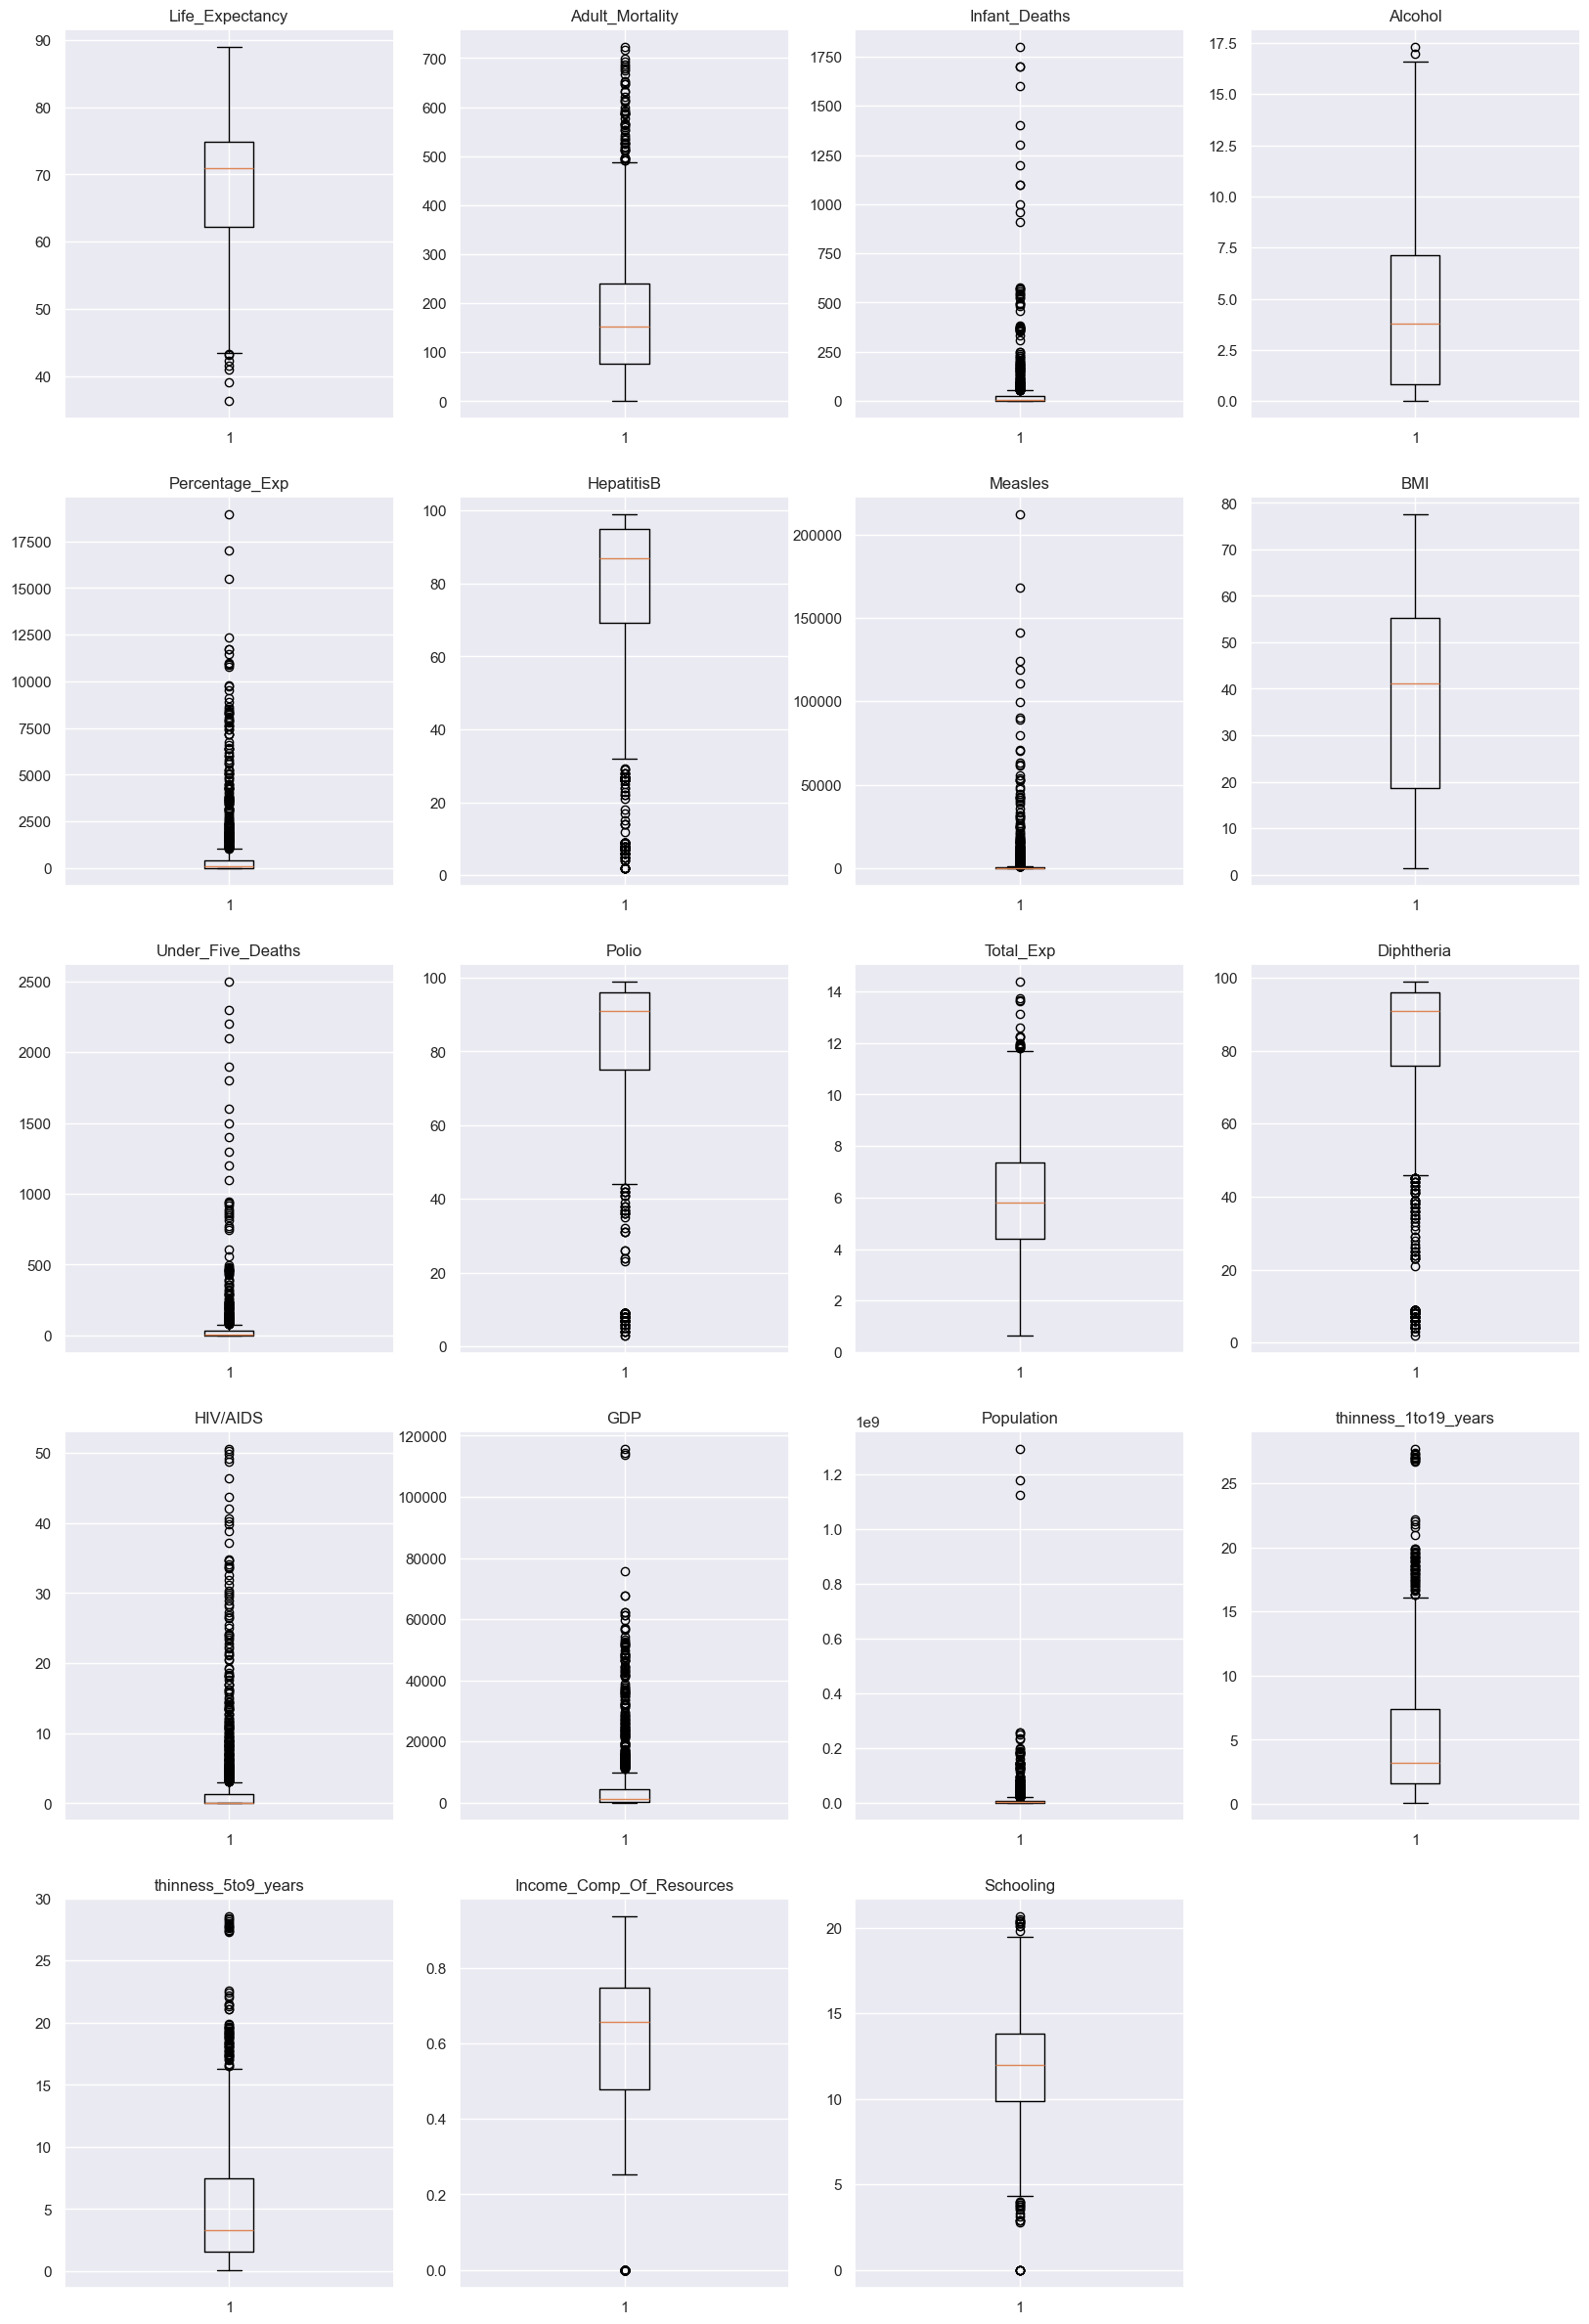

In [642]:
# Create a dictionary of columns.
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Infant_Deaths':3,'Alcohol':4,'Percentage_Exp':5,'HepatitisB':6,'Measles':7,'BMI':8,'Under_Five_Deaths':9,'Polio':10,'Total_Exp':11,'Diphtheria':12,'HIV/AIDS':13,'GDP':14,'Population':15,'thinness_1to19_years':16,'thinness_5to9_years':17,'Income_Comp_Of_Resources':18,'Schooling':19}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [643]:
# Calculate number of outliers and its percentage in each variable using Interquartile Range (IQR) method

for variable in col_dict.keys():
    q75, q25 = np.percentile(train[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((train[variable] > max_val) |
                                                                                           (train[variable] < min_val))[0])),len((np.where((train[variable] > max_val) |
                                                                                           (train[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life_Expectancy : 7 and 0.3522898842476095
Number of outliers and percentage of it in Adult_Mortality : 55 and 2.7679919476597887
Number of outliers and percentage of it in Infant_Deaths : 179 and 9.008555611474584
Number of outliers and percentage of it in Alcohol : 2 and 0.10065425264217413
Number of outliers and percentage of it in Percentage_Exp : 193 and 9.713135379969804
Number of outliers and percentage of it in HepatitisB : 153 and 7.700050327126321
Number of outliers and percentage of it in Measles : 312 and 15.702063412179164
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in Under_Five_Deaths : 208 and 10.468042274786109
Number of outliers and percentage of it in Polio : 143 and 7.19677906391545
Number of outliers and percentage of it in Total_Exp : 18 and 0.9058882737795672
Number of outliers and percentage of it in Diphtheria : 175 and 8.807247106190237
Number of outliers and perc

Verificamos que algumas variáveis possuem uma quantidade enorme de outliers, inclusive algumas tem valores absurdos e impossíveis, como a variável Infant_Deaths, que é a informação de mortes infantis a cada 1000 habitantes, e a variável possui valores de até 1800, o que não faz sentido.
A partir dessa análise vamos tratar esses outliers utilizando a técnica Winsorize, que transforma os valores mais extremos em valores que se encaixam nos limites do box-plot

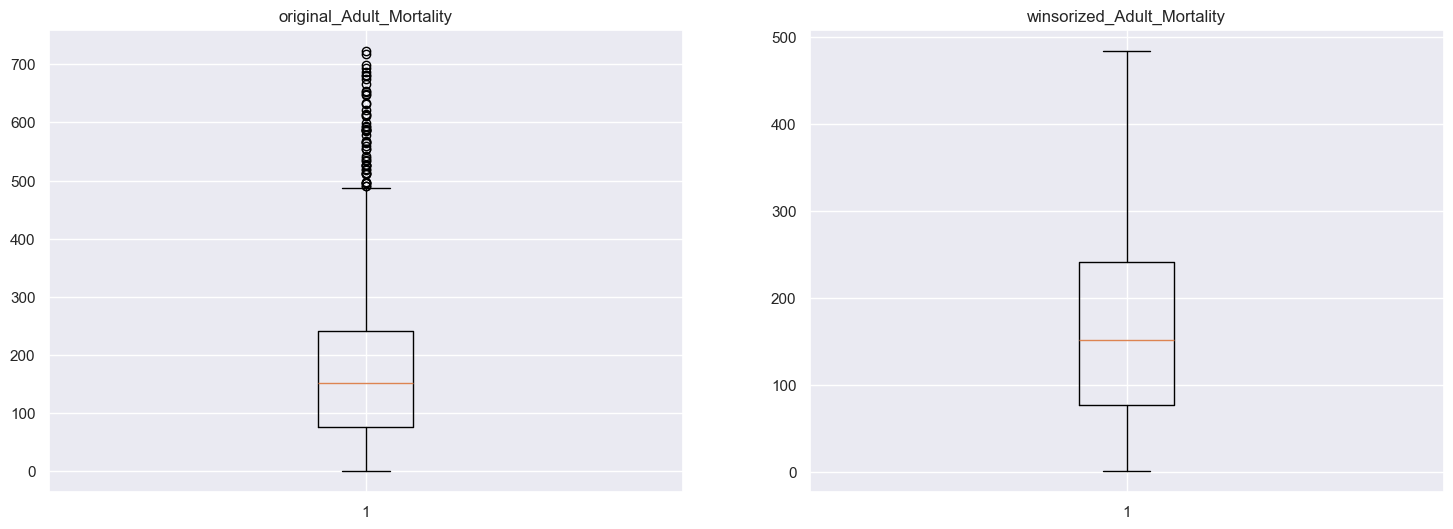

In [644]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Adult_Mortality = train['Adult_Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("original_Adult_Mortality")

plt.subplot(1,2,2)
# Aqui nós definimos a porcentagem de valores que será alterada na variável.
# Nesse caso por exemplo, 0% dos valores mais baixos e 3.5% dos valores mais altos estão sendo alterados.
# O mesmo será feito para todas as outras variáveis
winsorized_Adult_Mortality = winsorize(train['Adult_Mortality'],(0,0.035))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.show()

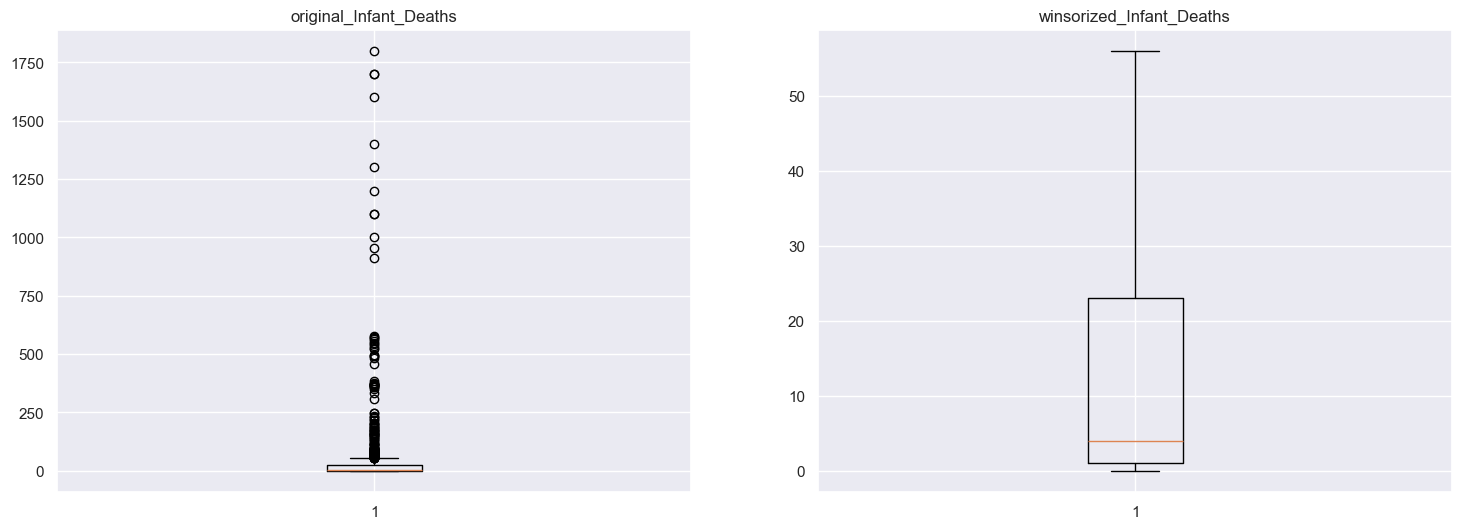

In [645]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Infant_Deaths
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Infant_Deaths = train['Infant_Deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("original_Infant_Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(train['Infant_Deaths'],(0,0.105))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.show()

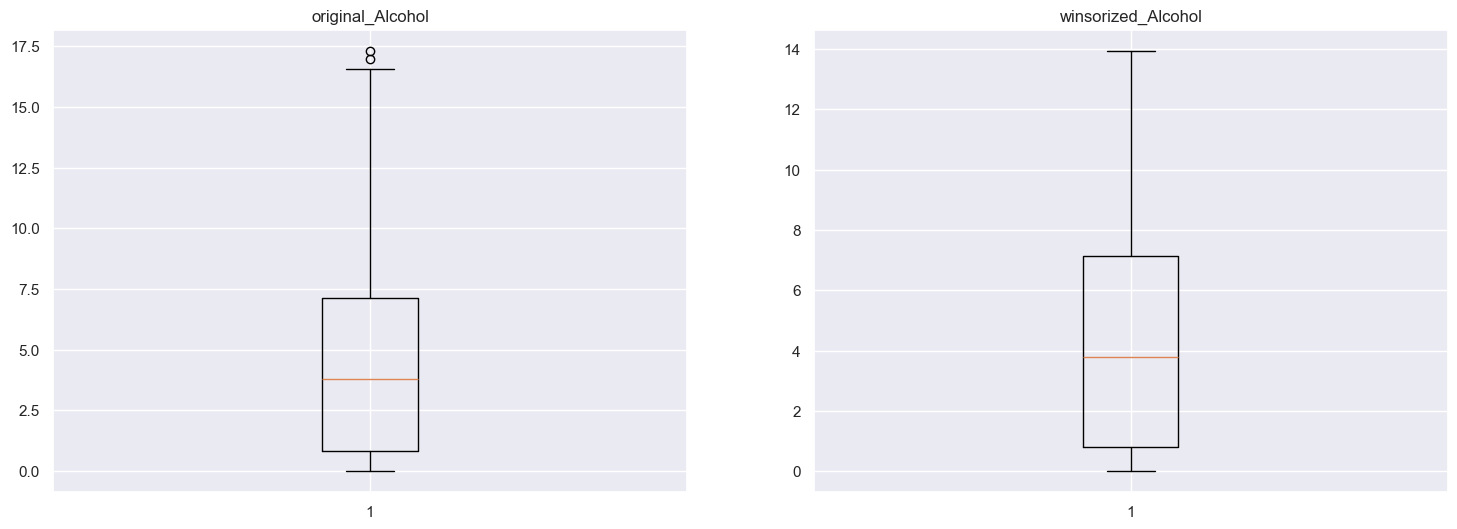

In [646]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Alcohol
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Alcohol = train['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("original_Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(train['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.show()

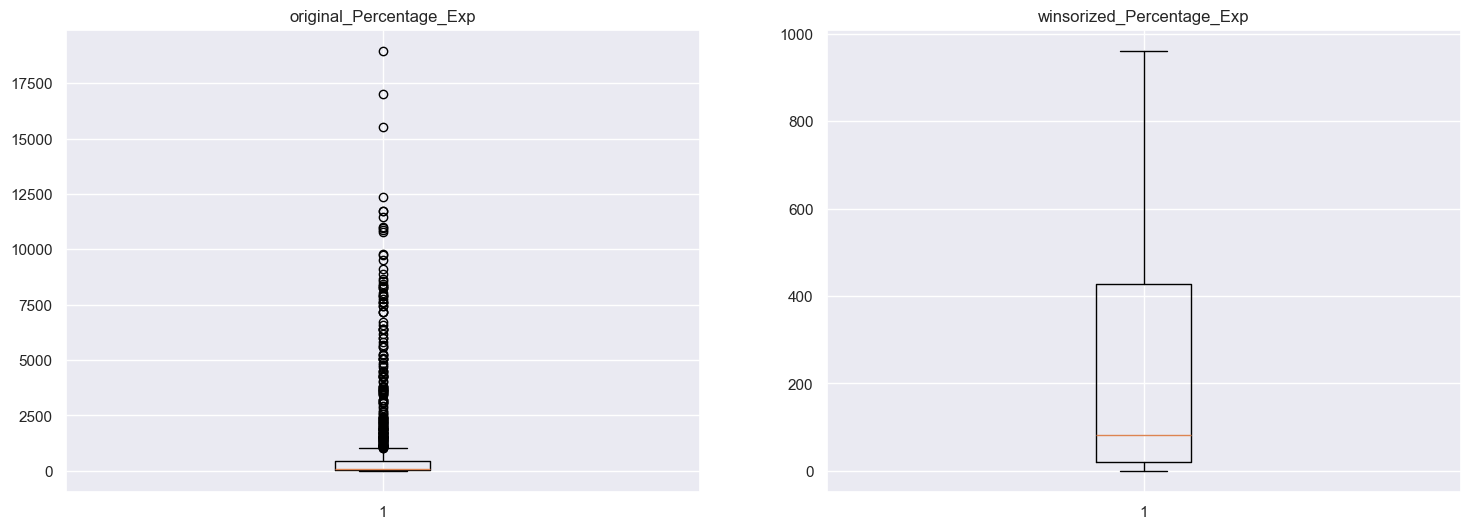

In [647]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Percentage_Exp
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Percentage_Exp = train['Percentage_Exp']
plt.boxplot(original_Percentage_Exp)
plt.title("original_Percentage_Exp")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(train['Percentage_Exp'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.show()

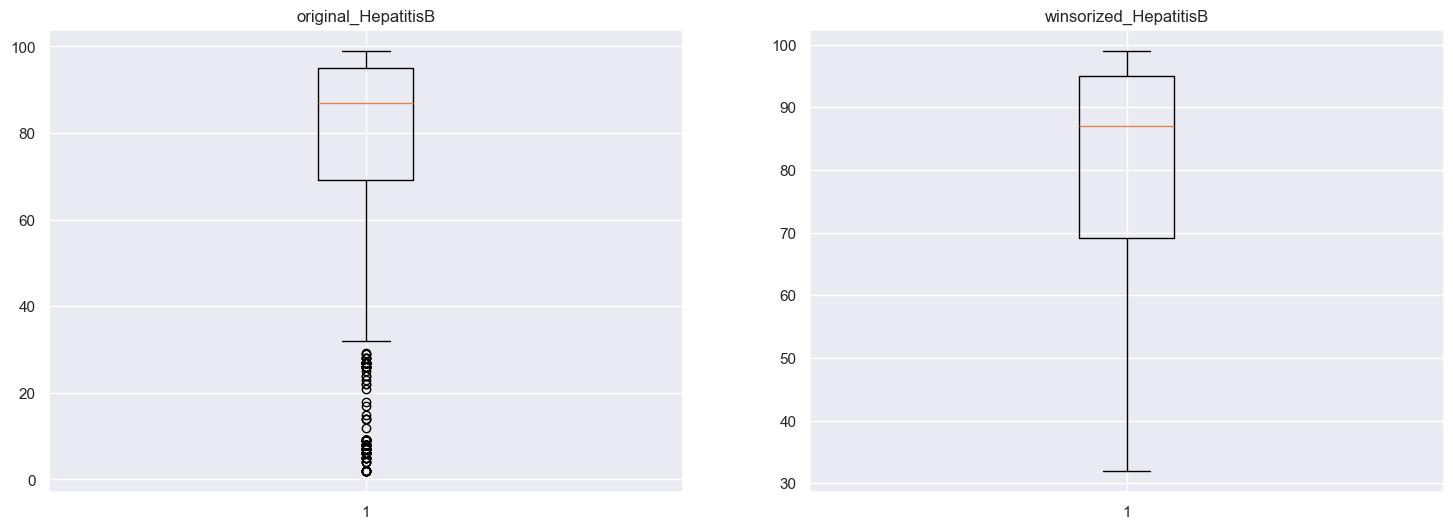

In [648]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize HepatitisB
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HepatitisB = train['HepatitisB']
plt.boxplot(original_HepatitisB)
plt.title("original_HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(train['HepatitisB'],(0.09,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.show()

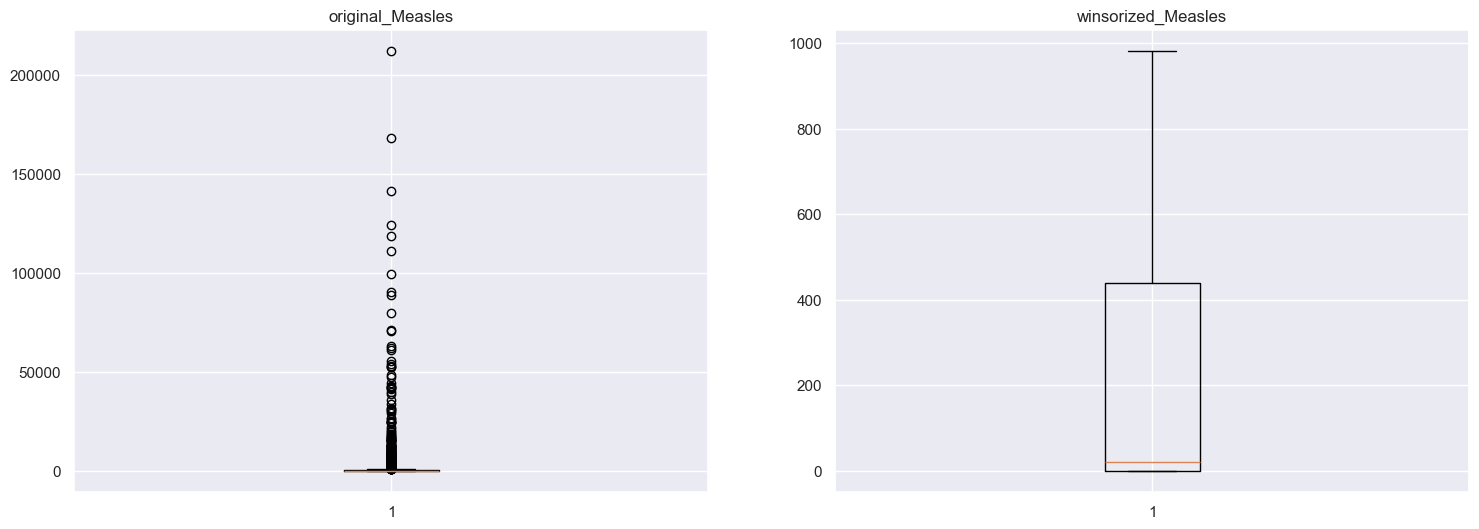

In [649]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Measles
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Measles = train['Measles']
plt.boxplot(original_Measles)
plt.title("original_Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(train['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.show()

In [650]:
# Winsorization altera 19% dos dados, o que pode não dar melhores resultados. Portanto, optamos por deletar a coluna.
train = train.drop('Measles',axis=1)

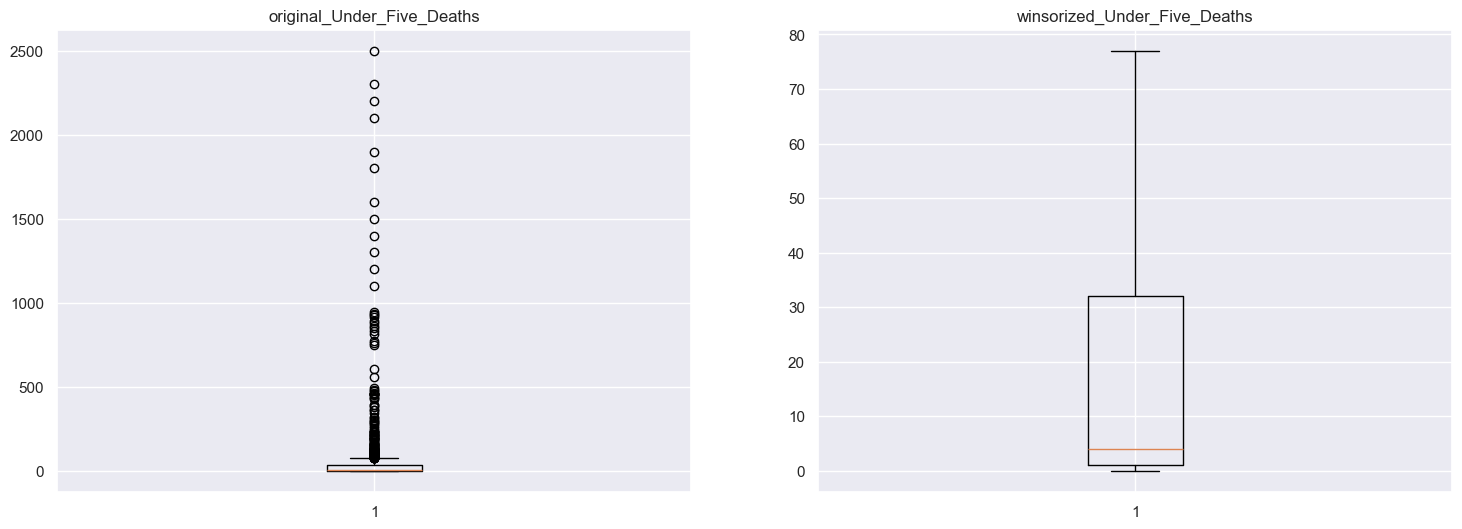

In [651]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Under_Five_Deaths
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Under_Five_Deaths = train['Under_Five_Deaths']
plt.boxplot(original_Under_Five_Deaths)
plt.title("original_Under_Five_Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(train['Under_Five_Deaths'],(0,0.125))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.show()

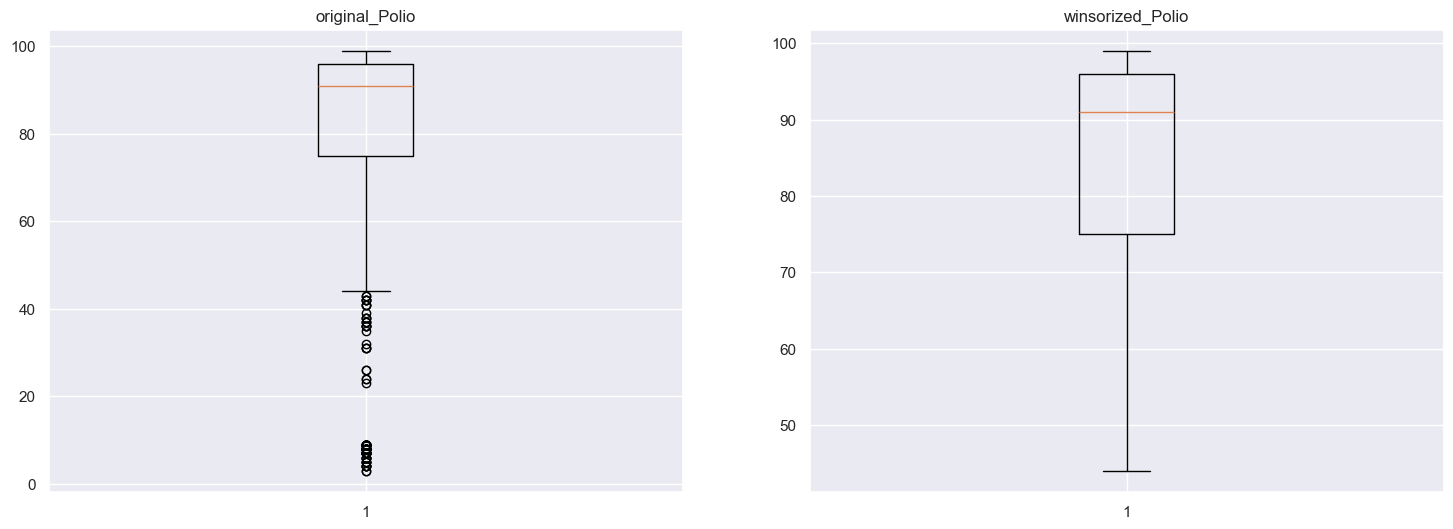

In [652]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Polio
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Polio = train['Polio']
plt.boxplot(original_Polio)
plt.title("original_Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(train['Polio'],(0.085,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.show()

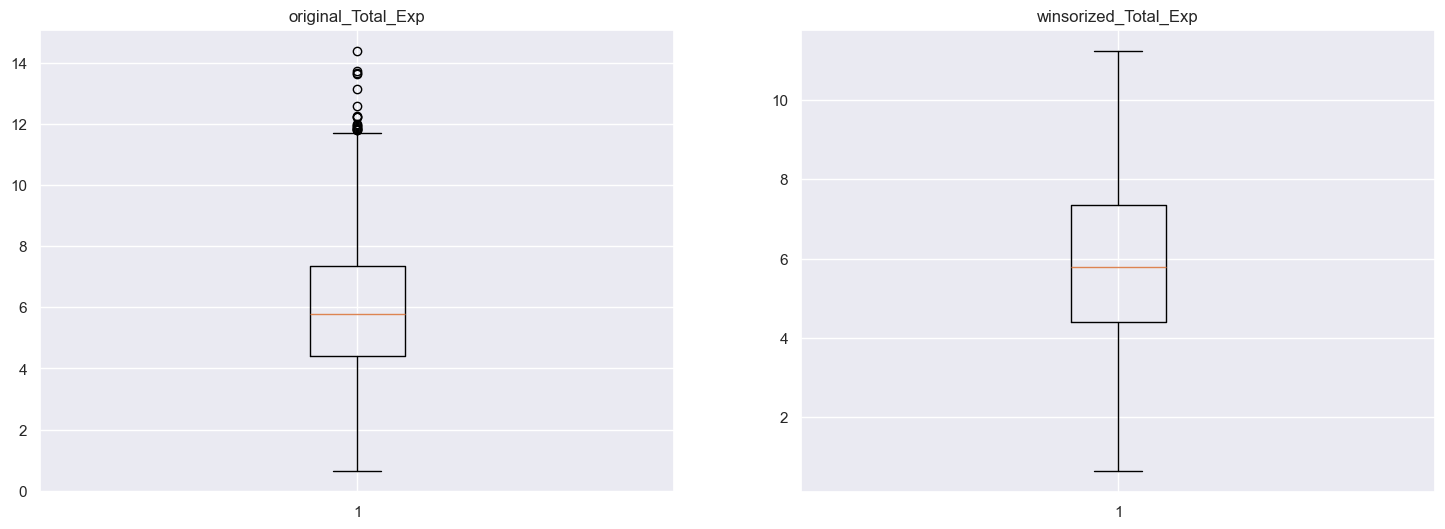

In [653]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Total_Exp
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Total_Exp = train['Total_Exp']
plt.boxplot(original_Total_Exp)
plt.title("original_Total_Exp")

plt.subplot(1,2,2)
winsorized_Total_Exp = winsorize(train['Total_Exp'],(0,0.02))
plt.boxplot(winsorized_Total_Exp)
plt.title("winsorized_Total_Exp")

plt.show()

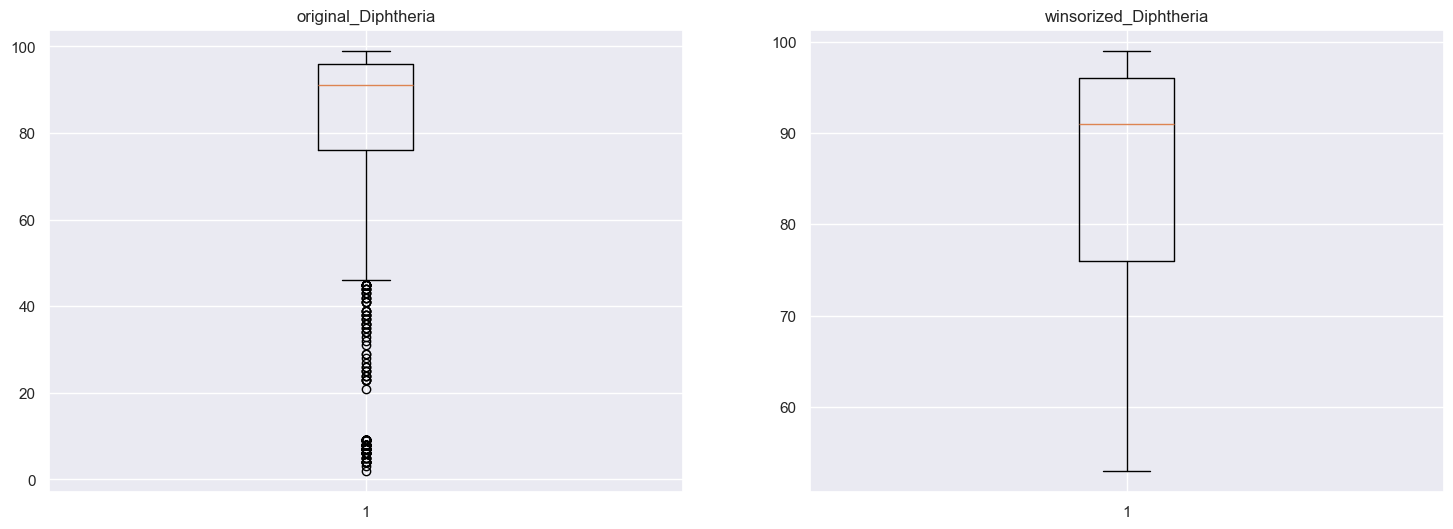

In [654]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Diphtheria
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Diphtheria = train['Diphtheria']
plt.boxplot(original_Diphtheria)
plt.title("original_Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(train['Diphtheria'],(0.12,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.show()

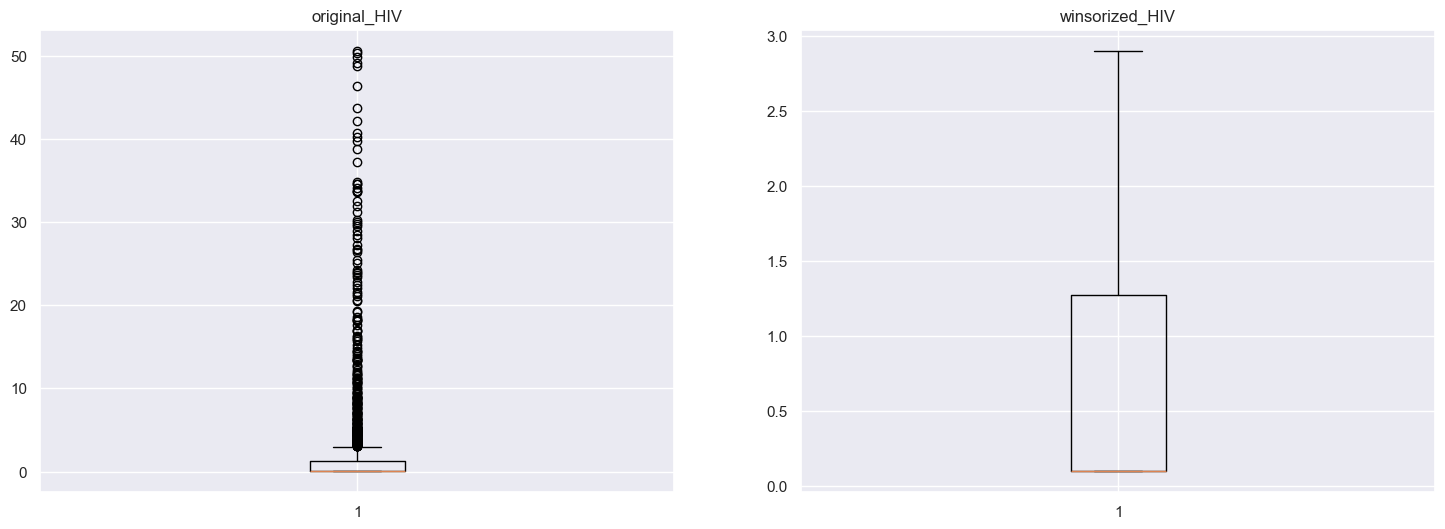

In [655]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize HIV
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_HIV = train['HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("original_HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(train['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.show()

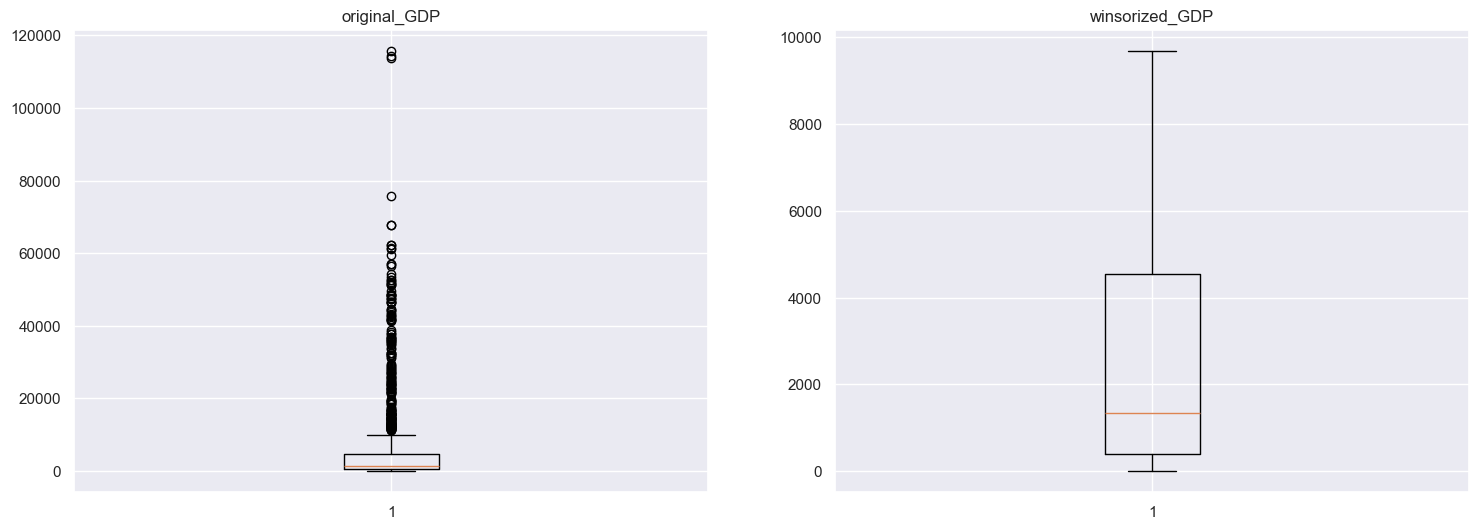

In [656]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize GDP
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_GDP = train['GDP']
plt.boxplot(original_GDP)
plt.title("original_GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(train['GDP'],(0,0.12))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.show()

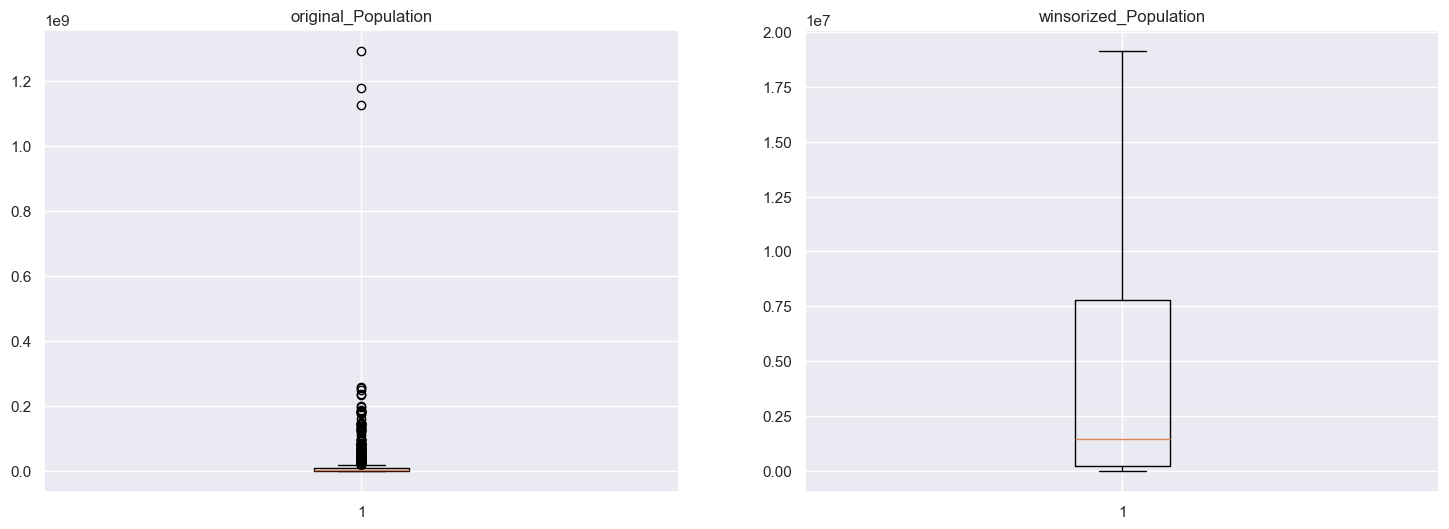

In [657]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Population
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Population = train['Population']
plt.boxplot(original_Population)
plt.title("original_Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(train['Population'],(0,0.125))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.show()

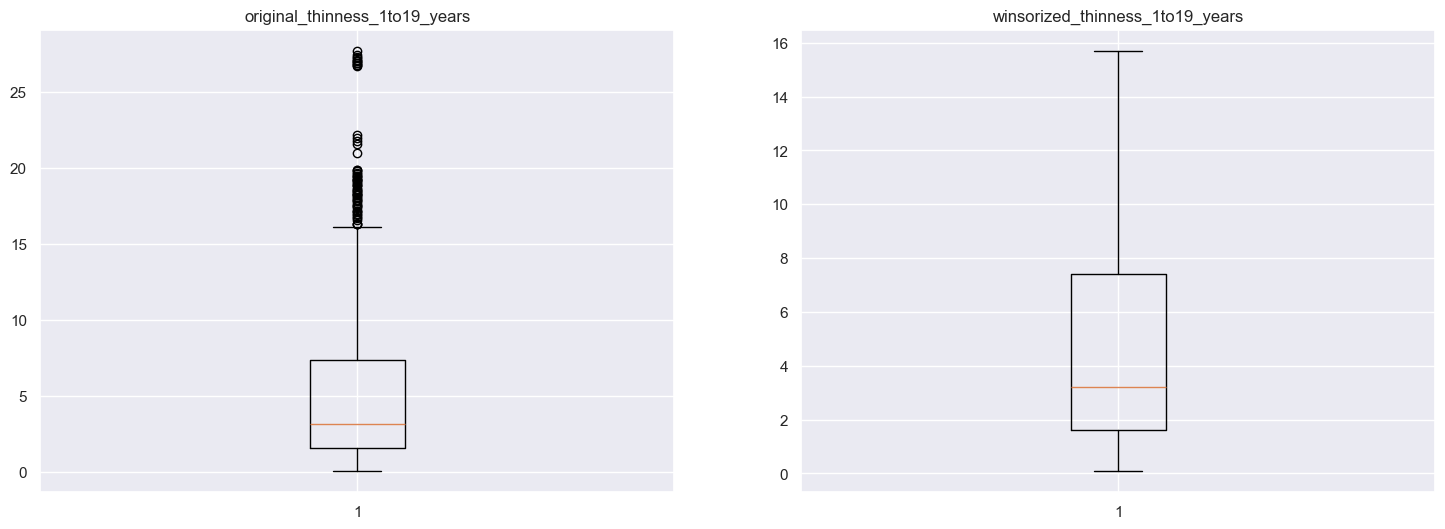

In [658]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize thinness_1to19_years
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_1to19_years = train['thinness_1to19_years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original_thinness_1to19_years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(train['thinness_1to19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.show()

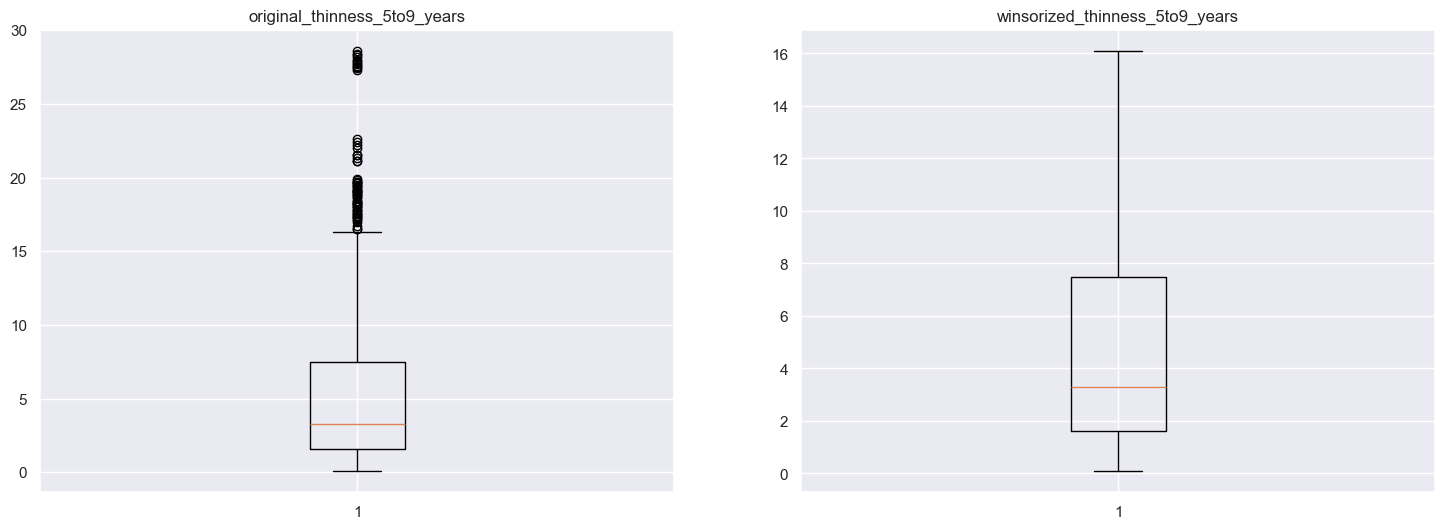

In [659]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize thinness_5to9_years
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_thinness_5to9_years = train['thinness_5to9_years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original_thinness_5to9_years")

plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(train['thinness_5to9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.show()

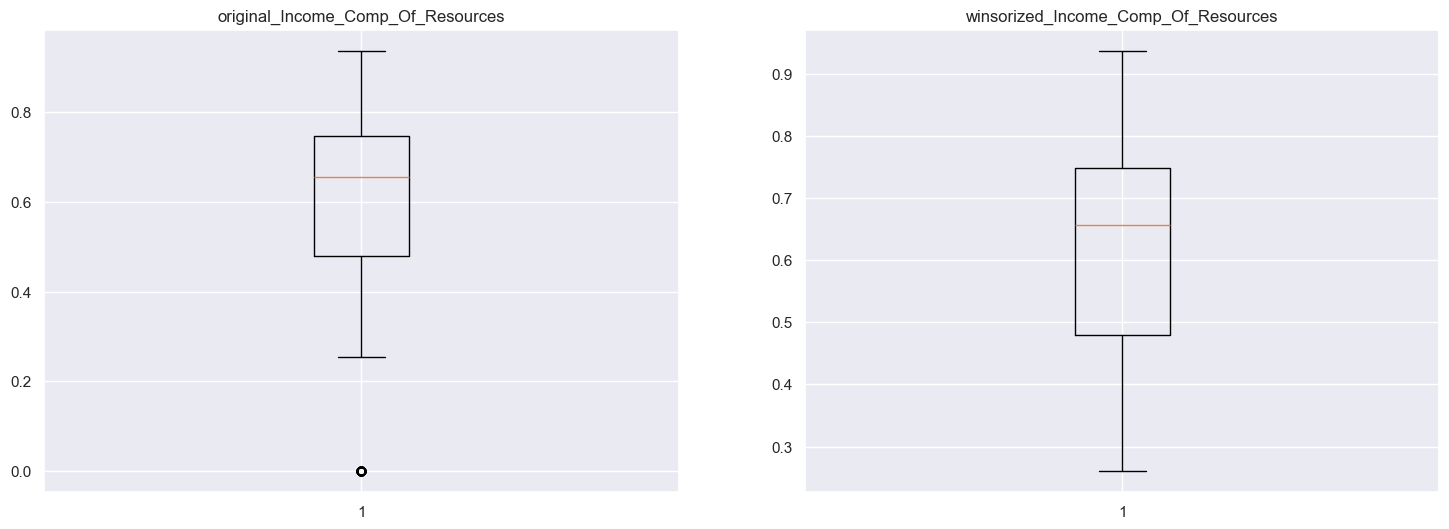

In [660]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Income_Comp_Of_Resources
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = train['Income_Comp_Of_Resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original_Income_Comp_Of_Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(train['Income_Comp_Of_Resources'],(0.04,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.show()

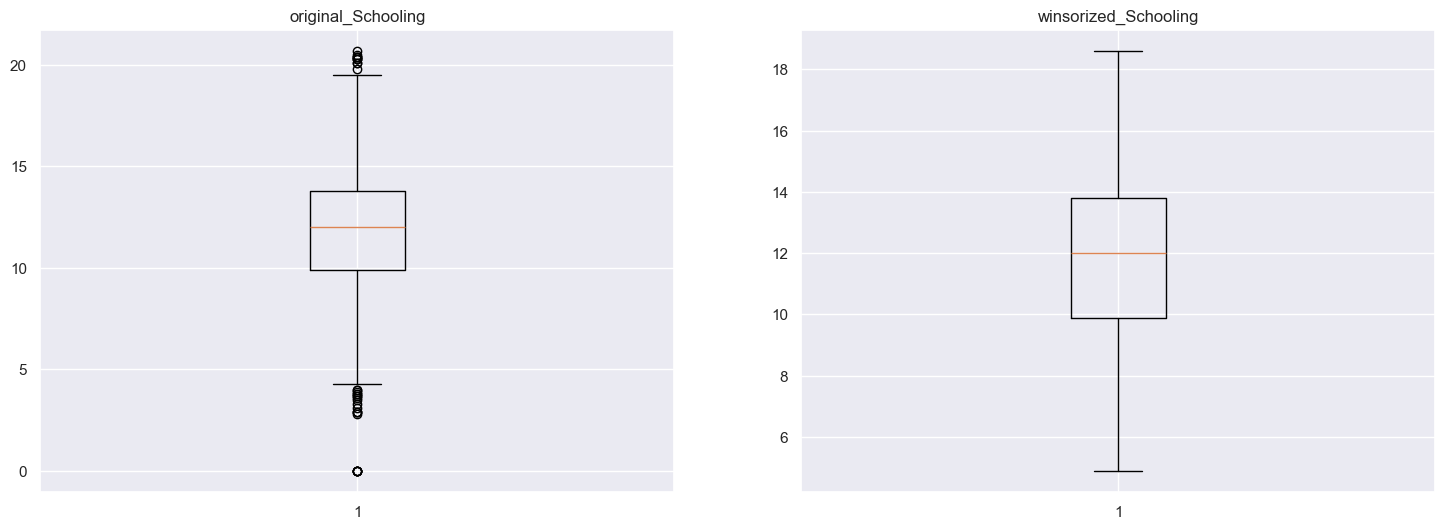

In [661]:
# Remoção de Outliers nas variáveis utilizando a técnica Winsorization.
# Winsorize Schooling
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
original_Schooling = train['Schooling']
plt.boxplot(original_Schooling)
plt.title("original_Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(train['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

### 3.5 - Adicionando as variáveis devidamente alteradas em nosso dataset

In [662]:
# Adding winsorized variables to the train frame.
train['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
train['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
train['winsorized_Alcohol'] = winsorized_Alcohol
train['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
train['winsorized_HepatitisB'] = winsorized_HepatitisB
train['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
train['winsorized_Polio'] = winsorized_Polio
train['winsorized_Total_Exp'] = winsorized_Total_Exp
train['winsorized_Diphtheria'] = winsorized_Diphtheria
train['winsorized_HIV'] = winsorized_HIV
train['winsorized_GDP'] = winsorized_GDP
train['winsorized_Population'] = winsorized_Population
train['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
train['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
train['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
train['winsorized_Schooling'] = winsorized_Schooling

### 3.6 - Verificação das alterações nas colunas

In [663]:
train.describe()

,Year,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,HepatitisB,BMI,Under_Five_Deaths,Polio,...,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling
count,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,...,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1.706000e+03,1706.000000,1706.000000,1706.000000,1706.000000
mean,2007.510551,68.190797,175.671747,33.753224,4.452888,611.911019,77.391403,37.172567,47.028136,80.626742,...,83.172463,5.893473,84.313143,0.798769,2949.097607,5.135174e+06,4.875909,4.945545,0.621596,11.755393
std,4.608185,9.648543,131.028407,128.769423,3.952433,1652.864110,25.273300,19.776616,175.919117,24.204970,...,17.433164,2.209369,15.247019,1.071827,3285.379156,6.779455e+06,4.136119,4.189523,0.173126,3.050761
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.000000,1.400000,0.000000,3.000000,...,44.000000,0.650000,53.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.261000,4.900000
25%,2004.000000,62.200000,76.250000,1.000000,0.812500,19.319835,69.200000,18.625000,1.000000,75.000000,...,75.000000,4.400000,76.000000,0.100000,393.456456,1.973178e+05,1.600000,1.600000,0.479250,9.900000
50%,2007.000000,71.000000,152.000000,4.000000,3.790000,81.094804,87.000000,41.150000,4.000000,91.000000,...,91.000000,5.790000,91.000000,0.100000,1345.045120,1.458058e+06,3.200000,3.300000,0.656500,12.000000
75%,2012.000000,74.800000,241.000000,23.000000,7.125000,427.687783,95.000000,55.300000,32.000000,96.000000,...,96.000000,7.347500,96.000000,1.275000,4540.385080,7.805794e+06,7.400000,7.500000,0.748000,13.800000
max,2015.000000,89.000000,723.000000,1800.000000,17.310000,18961.348600,99.000000,77.600000,2500.000000,99.000000,...,99.000000,11.240000,99.000000,2.900000,9692.163874,1.913966e+07,15.700000,16.100000,0.937000,18.600000


Para entender melhor o comportamento das variáveis após realizar o tratamento, vamos visualizar as distribuições das variáveis originais e comparar com as novas variáveis que receberam o Winsorize

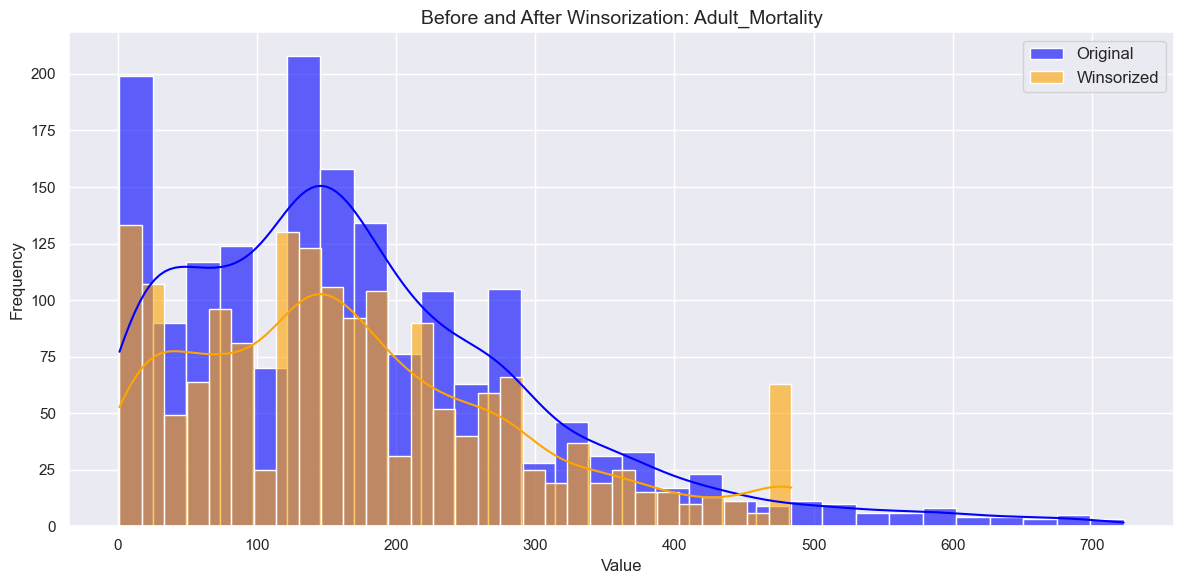

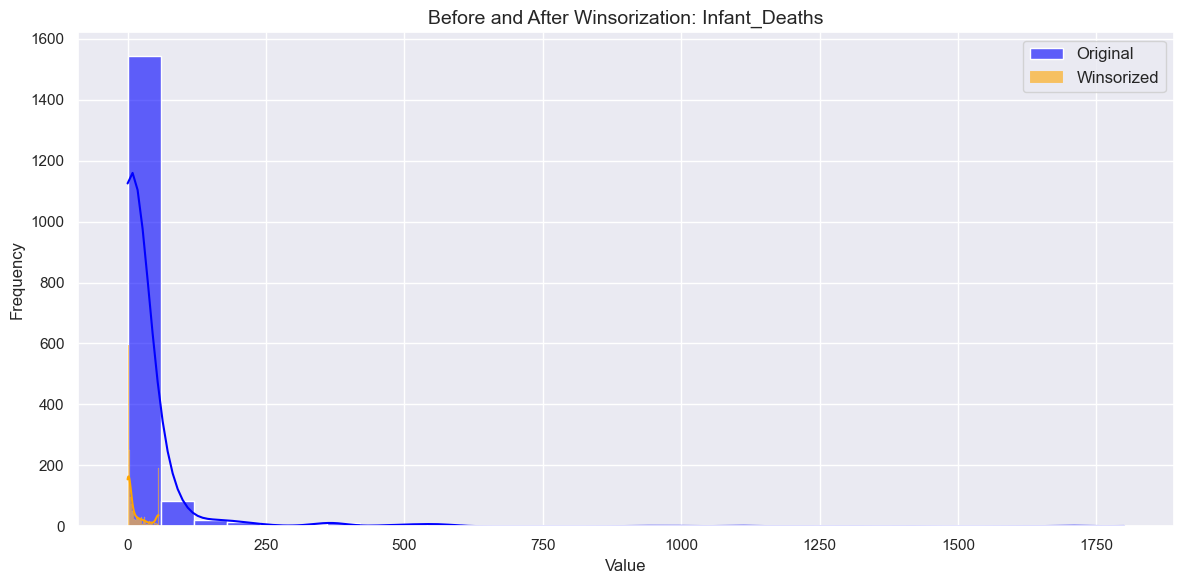

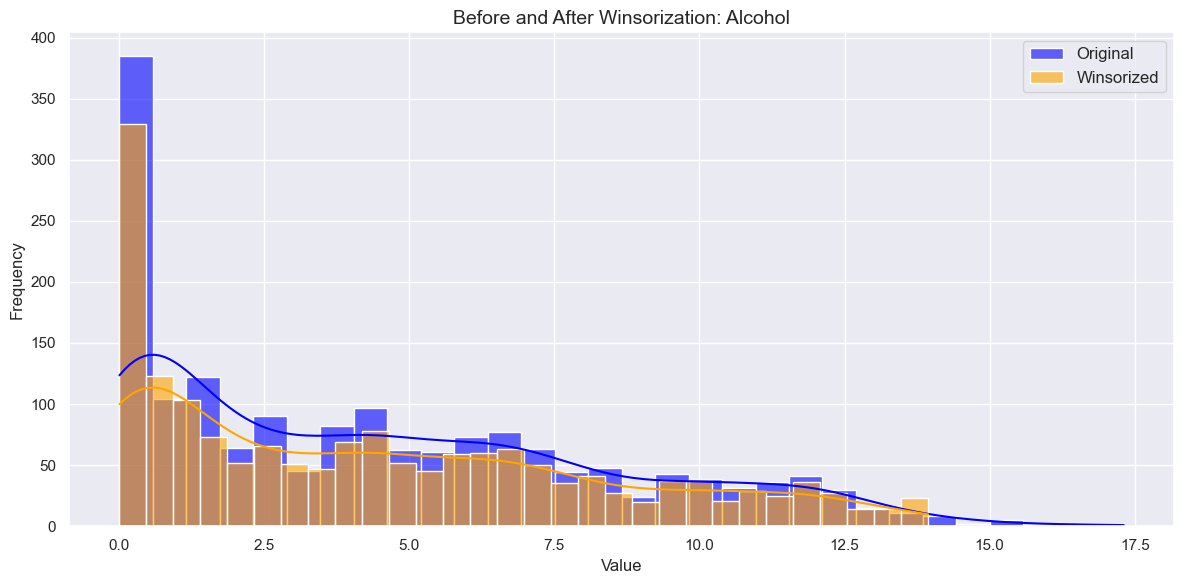

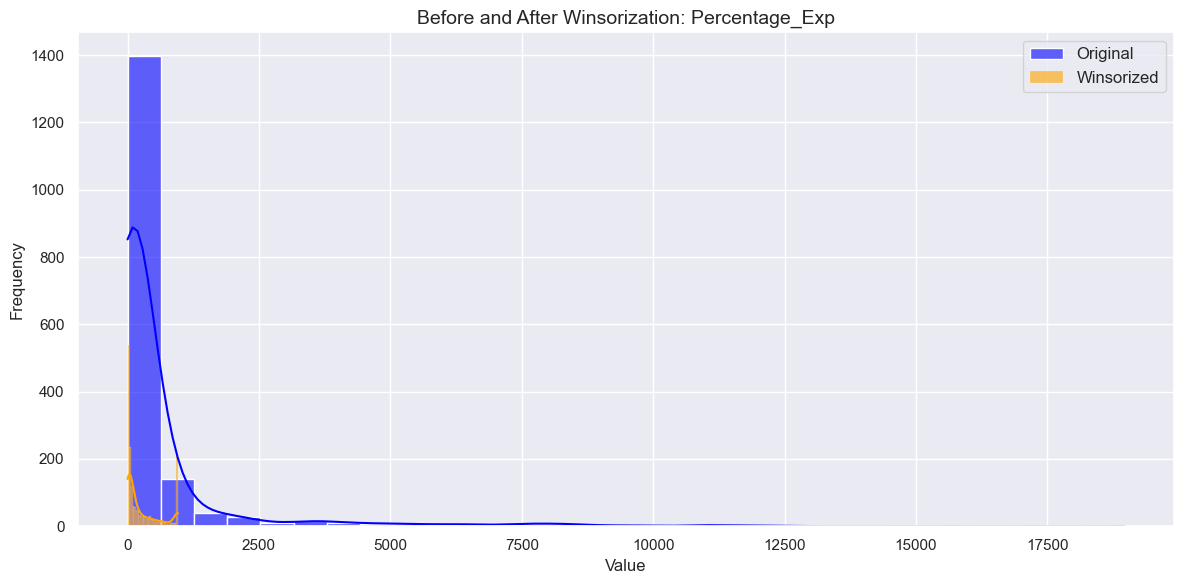

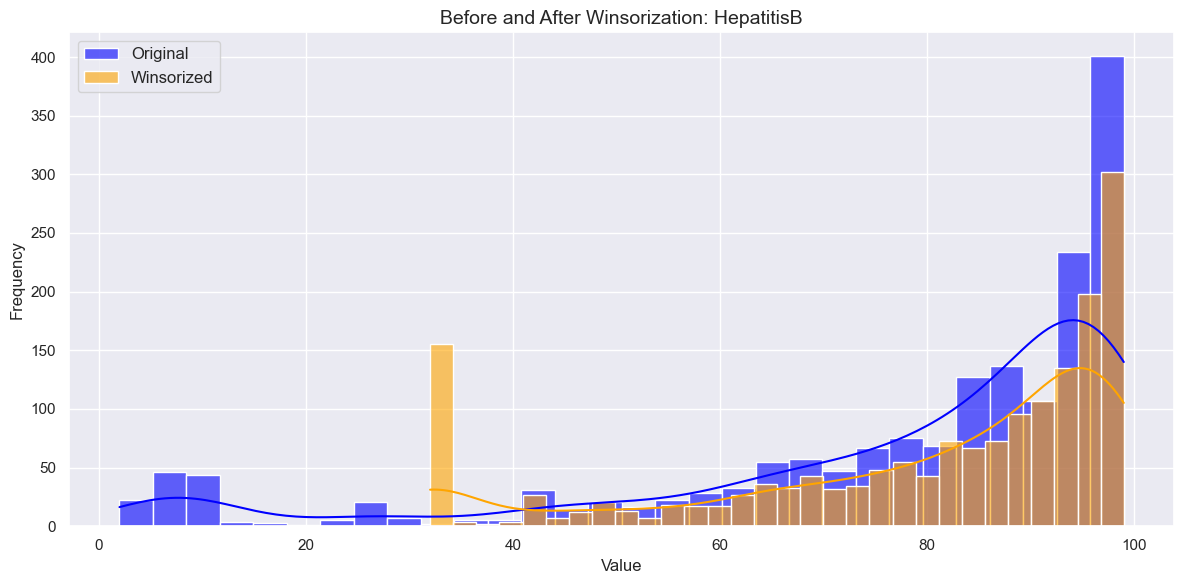

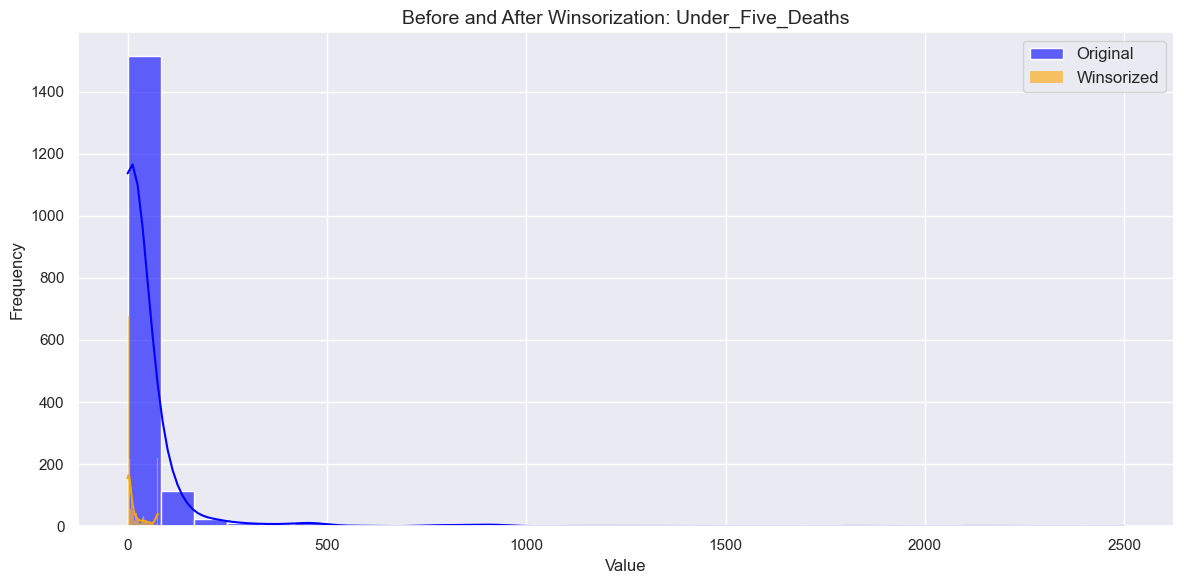

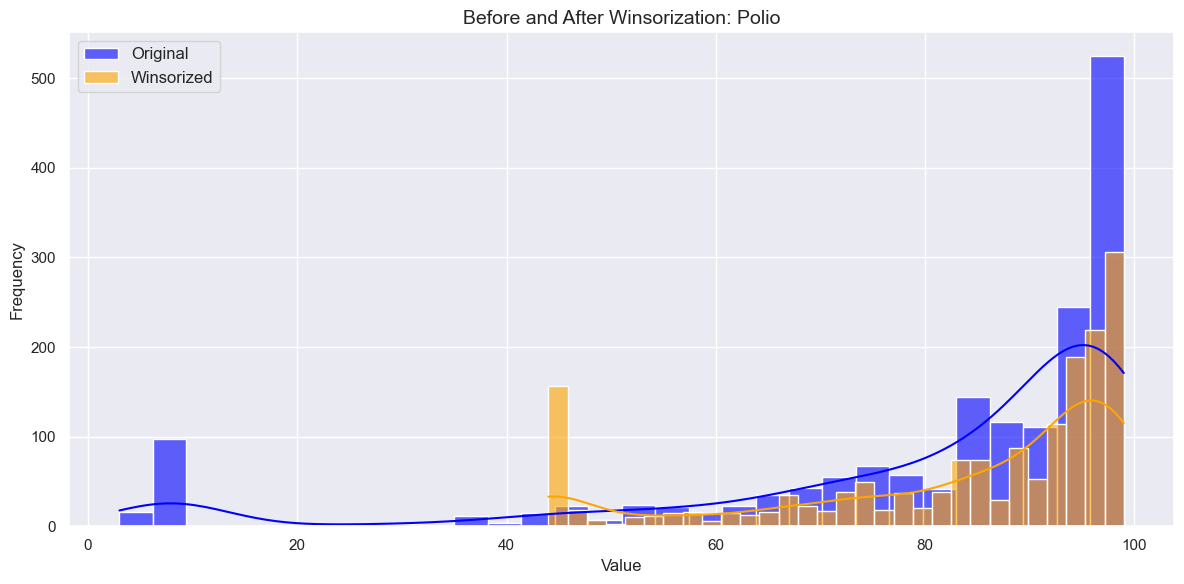

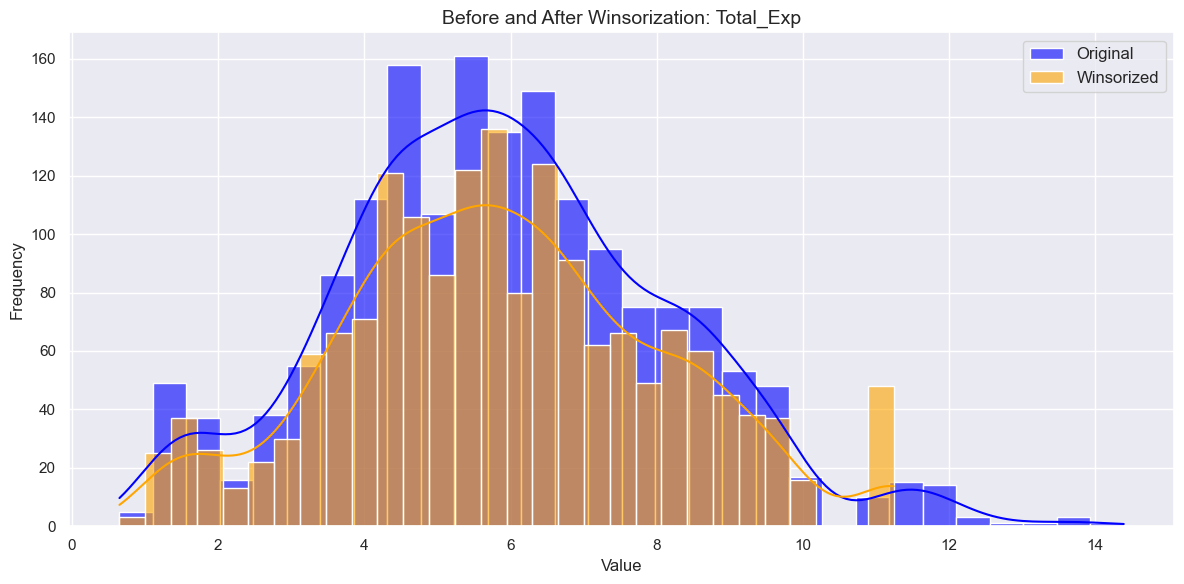

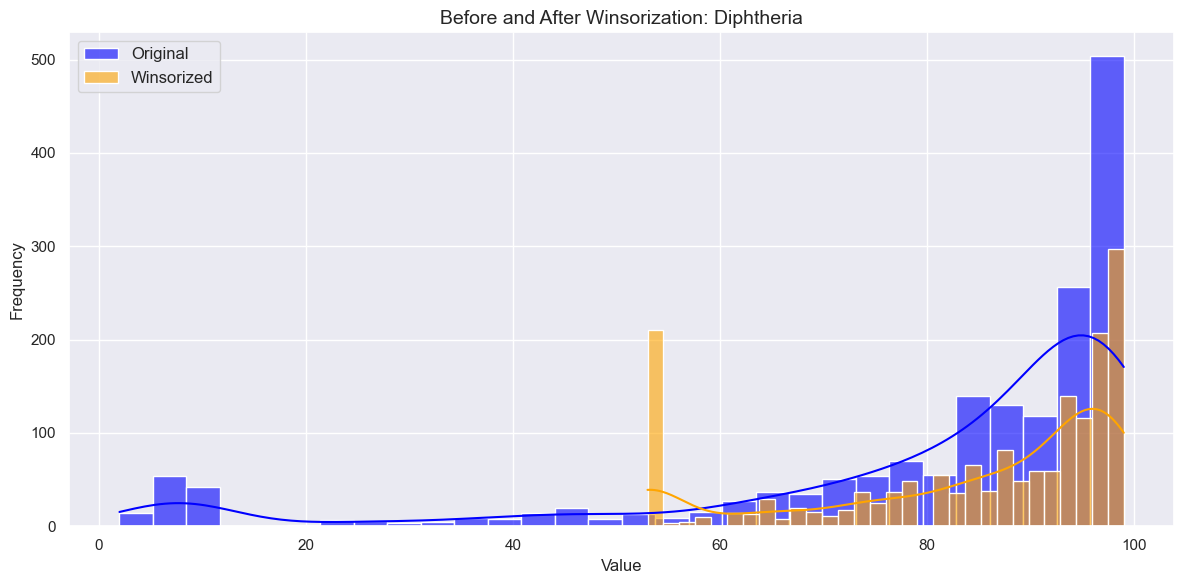

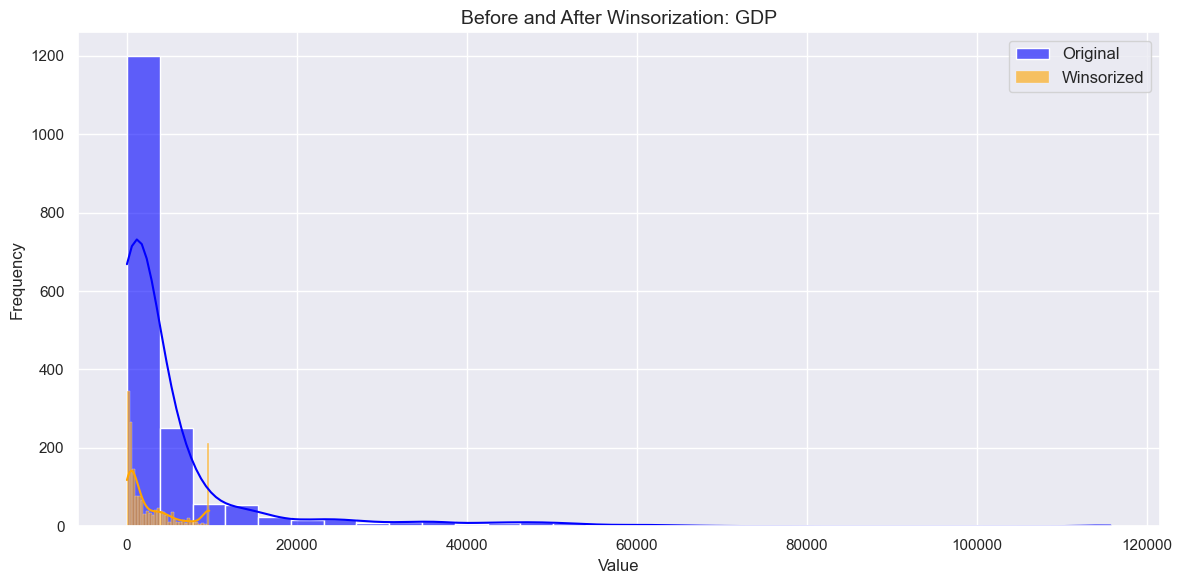

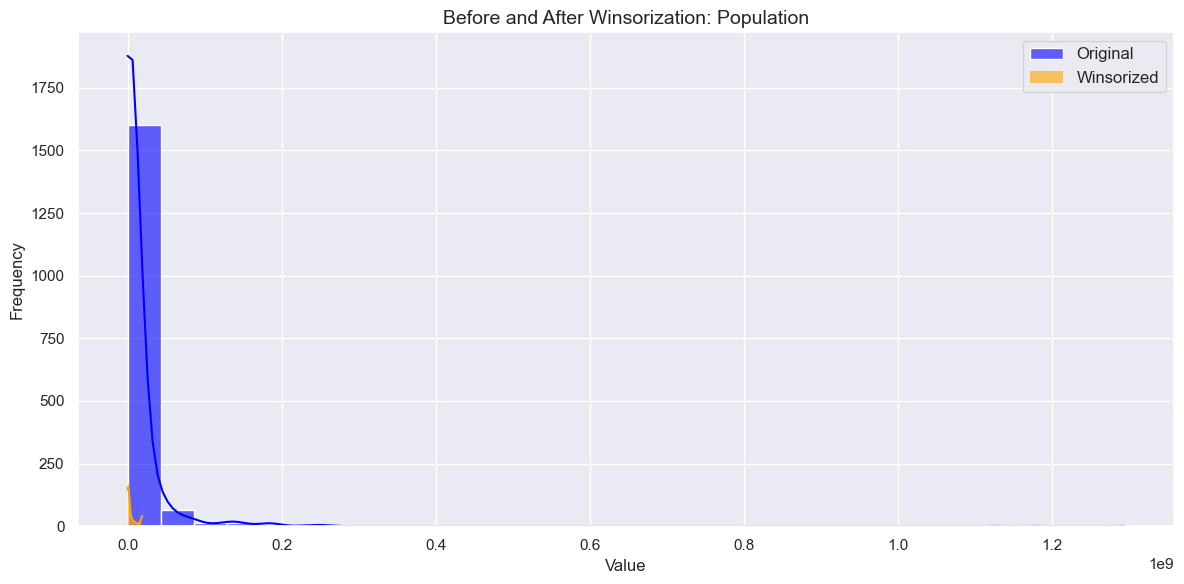

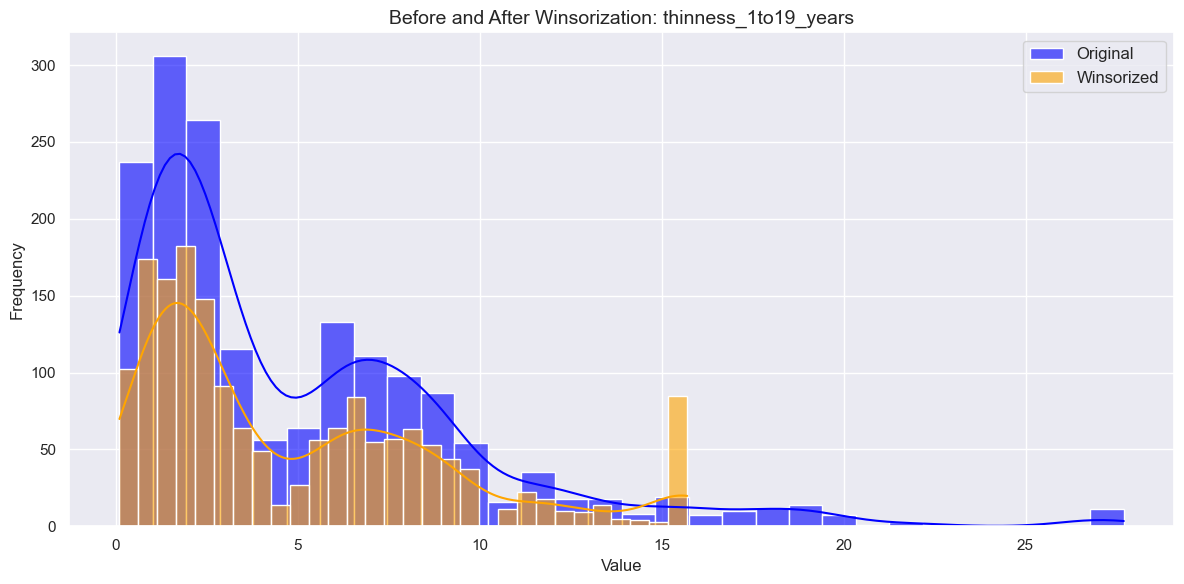

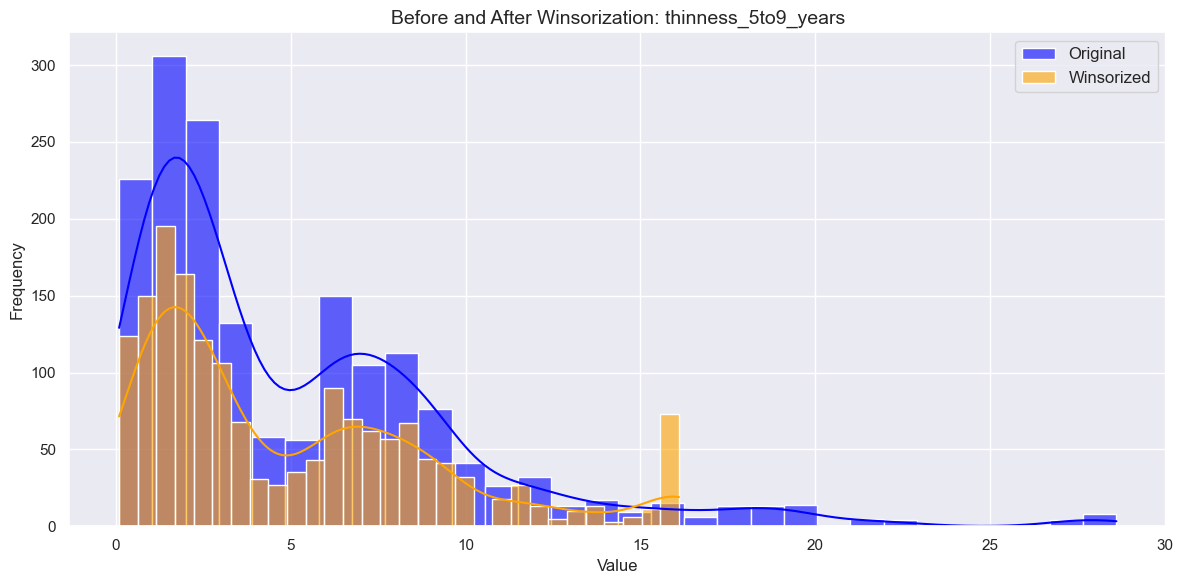

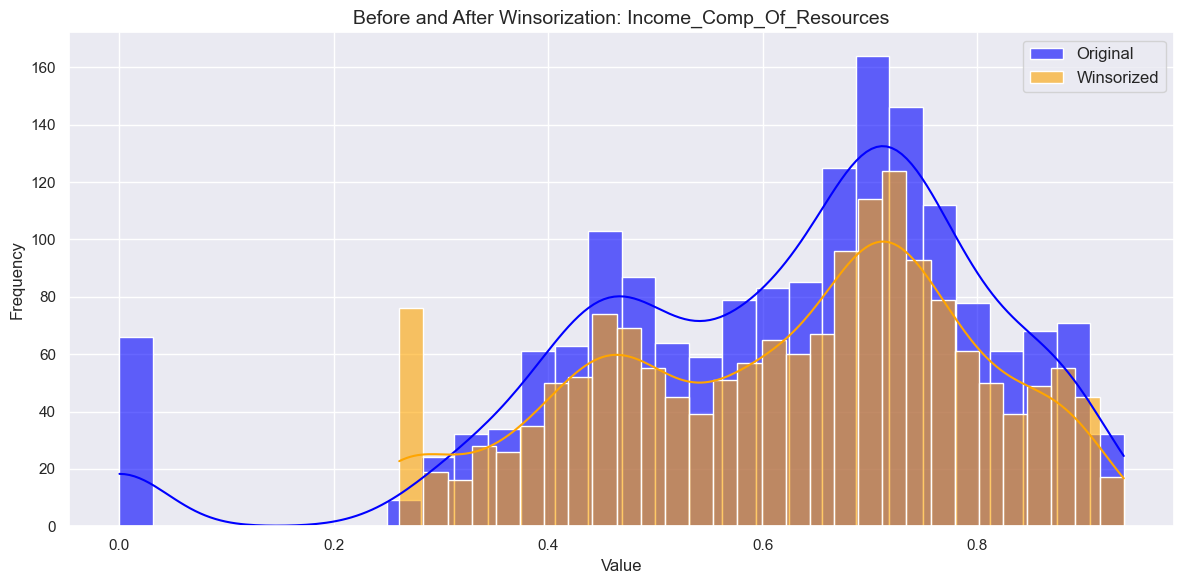

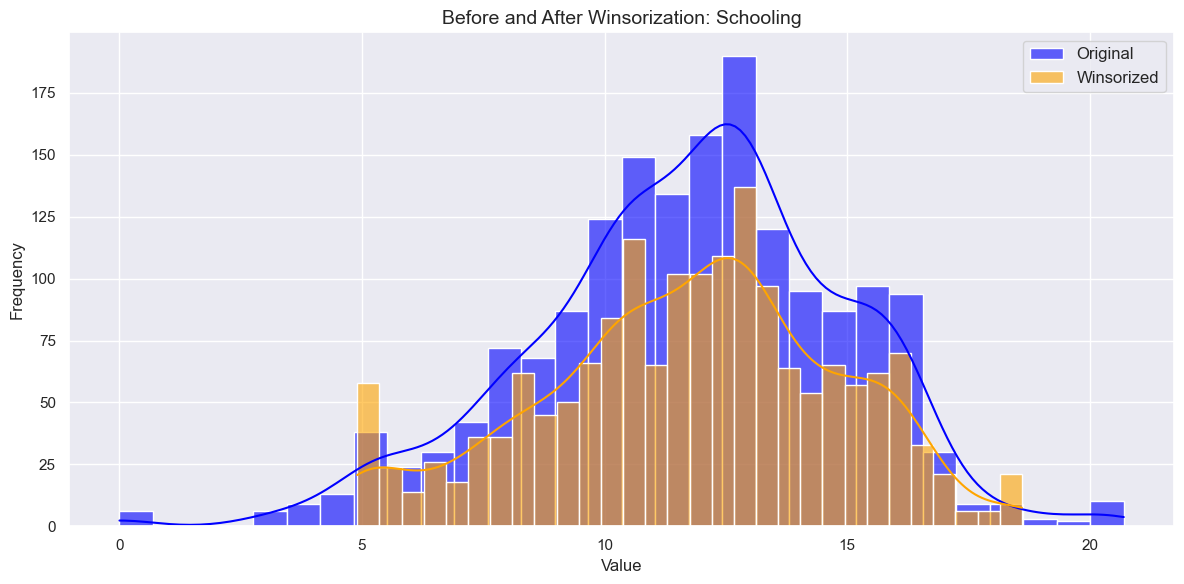

In [664]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns and their Winsorized counterparts
columns = [
    'Adult_Mortality', 'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 
    'HepatitisB', 'Measles', 'BMI', 'Under_Five_Deaths', 'Polio', 
    'Total_Exp', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 
    'thinness_1to19_years', 'thinness_5to9_years', 
    'Income_Comp_Of_Resources', 'Schooling'
]

# Loop through each column and plot histograms
for col in columns:
    original_col = col
    winsorized_col = f'winsorized_{col}'  # Construct the Winsorized column name

    if winsorized_col in train.columns:  # Check if Winsorized column exists
        plt.figure(figsize=(12, 6))

        # Plot original values
        sns.histplot(train[original_col], kde=True, color="blue", label='Original', bins=30, alpha=0.6)

        # Plot Winsorized values
        sns.histplot(train[winsorized_col], kde=True, color="orange", label='Winsorized', bins=30, alpha=0.6)

        # Add title and labels
        plt.title(f"Before and After Winsorization: {original_col}", fontsize=14)
        plt.xlabel("Value", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.legend(fontsize=12)

        plt.tight_layout()
        plt.show()


Como podemos ver, a maioria das variáveis não teve muita alteração e manteve uma distribuição muito próxima da original, e algumas variáveis que possuíam valores extremos que podem acabar prejudicando nossos resultados.

# <font size="12">4 - Análise dos dados</font>

### 4.1 - Alguns insights

Vamos procurar correlações relevantes para decidir quais colunas são mais relevantes no treinamento do nosso modelo Vamos começar com algumas estatísticas mais gerais sobre nossos dados

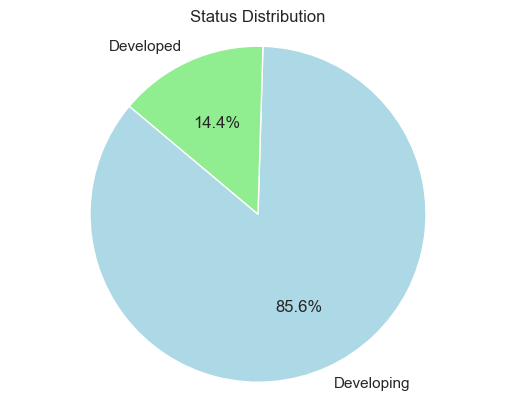

In [665]:
# Count the occurrences of each status
status_counts = train['Status'].value_counts()

# Define labels and colors for the pie chart
labels = ['Developing', 'Developed']
colors = ['lightblue', 'lightgreen']

# Create the pie chart
plt.pie(status_counts, labels=labels, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title("Status Distribution")

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.show()

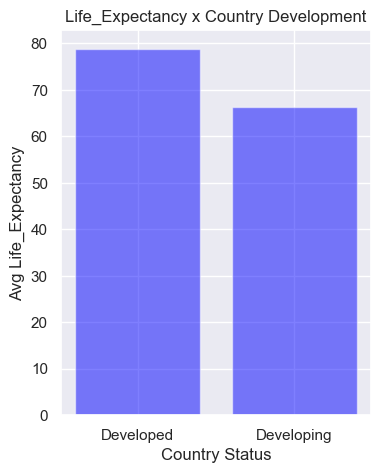

In [666]:
plt.figure(figsize=(4,5))
plt.bar(train.groupby('Status')['Status'].count().index,train.groupby('Status')['Life_Expectancy'].mean(),color='blue',alpha=0.50)
plt.xlabel("Country Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy x Country Development")
plt.show()

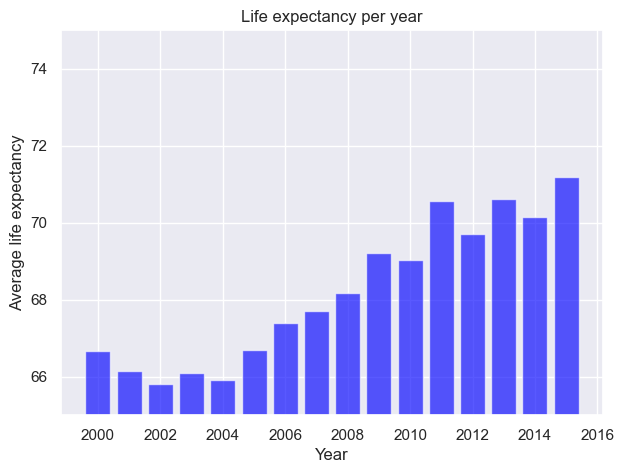

In [667]:
# Life_Expectancy w.r.t Year using bar plot.
plt.figure(figsize=(7,5))
plt.bar(train.groupby('Year')['Year'].count().index,train.groupby('Year')['Life_Expectancy'].mean(),color='blue',alpha=0.65)
plt.xlabel("Year",fontsize=12)
plt.ylabel("Average life expectancy",fontsize=12)
plt.title("Life expectancy per year")
plt.ylim(65, 75)
plt.show()

### 4.2 - Criação da matriz de confusão

In [668]:
# Preparando os dados no no tamanho correto para construção do heatmap

# Correlation of winsorized variables
columns_to_include = [3] + list(range(21, train.shape[1]))
train_win = train.iloc[:, columns_to_include]
train_win['Country'] = train['Country']
train_win['Year'] = train['Year']

# Na variável status, temos que transformar os valores categóricos em numérico, para que ela possa ser incluída em nosso teste.
train_win['Status'] = train['Status'].replace({'Developing': 0, 'Developed': 1})
train_win['Life_Expectancy'] = train['Life_Expectancy']

train_win_num = train_win.iloc[:,:-3]
cormat = train_win_num.corr()

In [669]:
train_win.head()

,Life_Expectancy,winsorized_Adult_Mortality,winsorized_Infant_Deaths,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Country,Year,Status
456,72.3,126.0,0,5.28,345.463714,96.000000,0,98.0,4.30,98.0,0.6,3112.285712,486438.0,8.1,8.0,0.602,11.9,Cabo Verde,2007,0
462,73.0,152.0,0,3.81,150.743486,79.454545,0,91.0,5.19,53.0,0.8,1268.884564,443716.0,9.4,9.3,0.562,11.0,Cabo Verde,2001,0
2667,74.9,13.0,3,1.29,594.645310,98.000000,3,98.0,7.26,98.0,0.1,4199.472530,1114558.0,6.4,6.3,0.720,14.7,Tunisia,2013,0
847,53.5,334.0,3,6.01,234.787421,32.000000,4,44.0,2.50,53.0,2.9,2711.171140,66647.0,1.4,1.3,0.542,8.2,Equatorial Guinea,2002,0
1987,59.6,321.0,11,0.59,124.378936,67.000000,14,62.0,6.79,68.0,1.4,588.358260,61724.0,1.5,1.4,0.433,7.2,Papua New Guinea,2003,0


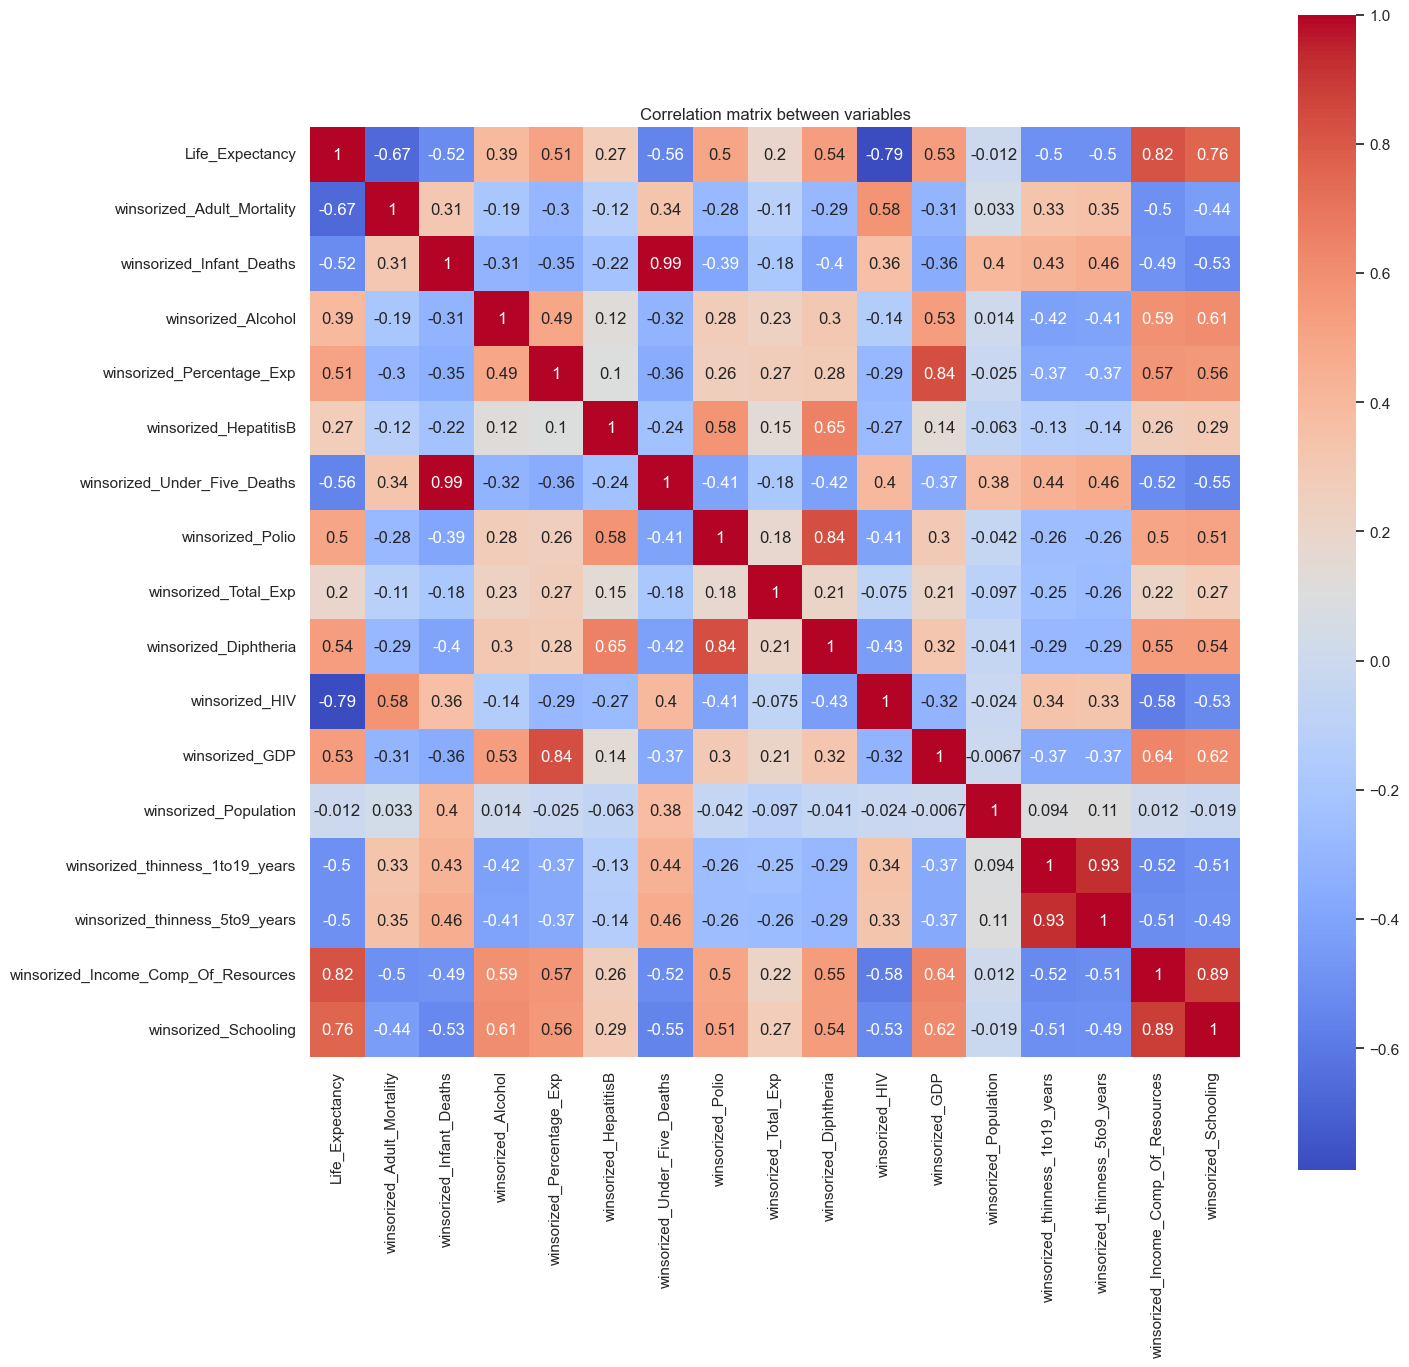

In [670]:
plt.figure(figsize=(15,15))
sns.heatmap(cormat, square=True, annot=True, cmap="coolwarm")
plt.title("Correlation matrix between variables")
plt.show()

Alguns pares de variáveis possuem correlação muito alta, como por exemplo, as variáveis "infant_deaths and under-five_deaths"

Para lidar com a multicolinearidade, uma opção é remover uma dessas variáveis, ja que a informação obtida delas está dizendo a mesma coisa.

In [671]:
# Remoção das variáveis mais redundantes
train_win = train_win.drop(['winsorized_thinness_5to9_years','winsorized_GDP','winsorized_Infant_Deaths'],axis=1)

In [672]:
train_win.describe()

,Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_Population,winsorized_thinness_1to19_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Year,Status
count,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000,1.706000e+03,1706.000000,1706.000000,1706.000000,1706.000000,1706.000000
mean,68.190797,172.464830,4.440842,265.470958,79.209574,19.826495,83.172463,5.893473,84.313143,0.798769,5.135174e+06,4.875909,0.621596,11.755393,2007.510551,0.143611
std,9.648543,121.337295,3.920173,333.396512,20.671607,27.041454,17.433164,2.209369,15.247019,1.071827,6.779455e+06,4.136119,0.173126,3.050761,4.608185,0.350797
min,36.300000,1.000000,0.010000,0.000000,32.000000,0.000000,44.000000,0.650000,53.000000,0.100000,3.400000e+01,0.100000,0.261000,4.900000,2000.000000,0.000000
25%,62.200000,76.250000,0.812500,19.319835,69.200000,1.000000,75.000000,4.400000,76.000000,0.100000,1.973178e+05,1.600000,0.479250,9.900000,2004.000000,0.000000
50%,71.000000,152.000000,3.790000,81.094804,87.000000,4.000000,91.000000,5.790000,91.000000,0.100000,1.458058e+06,3.200000,0.656500,12.000000,2007.000000,0.000000
75%,74.800000,241.000000,7.125000,427.687783,95.000000,32.000000,96.000000,7.347500,96.000000,1.275000,7.805794e+06,7.400000,0.748000,13.800000,2012.000000,0.000000
max,89.000000,484.000000,13.940000,961.177468,99.000000,77.000000,99.000000,11.240000,99.000000,2.900000,1.913966e+07,15.700000,0.937000,18.600000,2015.000000,1.000000


### 4.3 - Plotando algumas fortes correlações

Aqui podemos ver a relação clara que exite, assim como o comportamento, de algumas das variáveis com números que chamaram atenção em nossa matriz de correlação

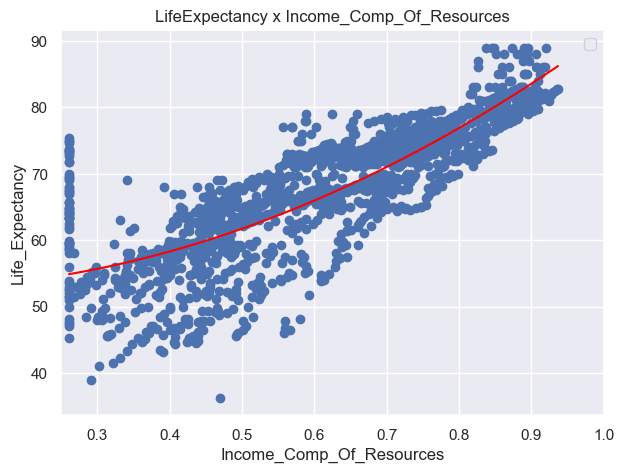

In [673]:
degree = 2  # Degree of the polynomial
coeffs = np.polyfit(train["winsorized_Income_Comp_Of_Resources"], train["Life_Expectancy"], degree)
poly = np.poly1d(coeffs)

# Generate x values for the polynomial line
x = np.linspace(min(train["winsorized_Income_Comp_Of_Resources"]), max(train["winsorized_Income_Comp_Of_Resources"]), 100)
y_poly = poly(x)

# Scatter plot with polynomial curve
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy x Income_Comp_Of_Resources")
plt.xlabel("Income_Comp_Of_Resources", fontsize=12)
plt.ylabel("Life_Expectancy", fontsize=12)
plt.scatter(train["winsorized_Income_Comp_Of_Resources"], train["Life_Expectancy"])
plt.plot(x, y_poly, color='red')
plt.xlim(0.25, 1)
plt.legend()
plt.show()

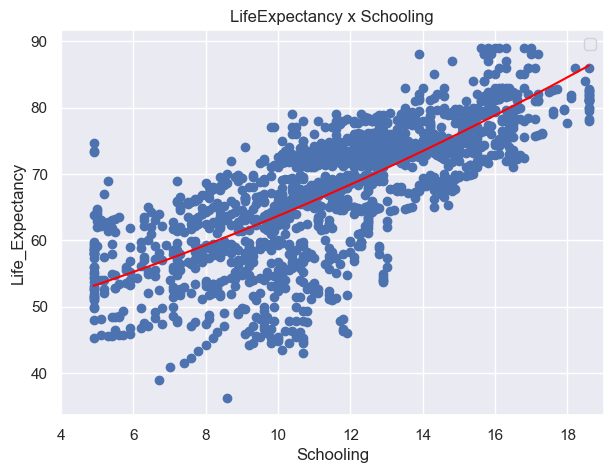

In [674]:
degree = 2  # Degree of the polynomial
coeffs = np.polyfit(train["winsorized_Schooling"], train["Life_Expectancy"], degree)
poly = np.poly1d(coeffs)

# Generate x values for the polynomial line
x = np.linspace(min(train["winsorized_Schooling"]), max(train["winsorized_Schooling"]), 100)
y_poly = poly(x)

# Scatter plot with polynomial curve
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy x Schooling")
plt.xlabel("Schooling", fontsize=12)
plt.ylabel("Life_Expectancy", fontsize=12)
plt.scatter(train["winsorized_Schooling"], train["Life_Expectancy"])
plt.plot(x, y_poly, color='red')
plt.xlim(4, 19)
plt.legend()
plt.show()

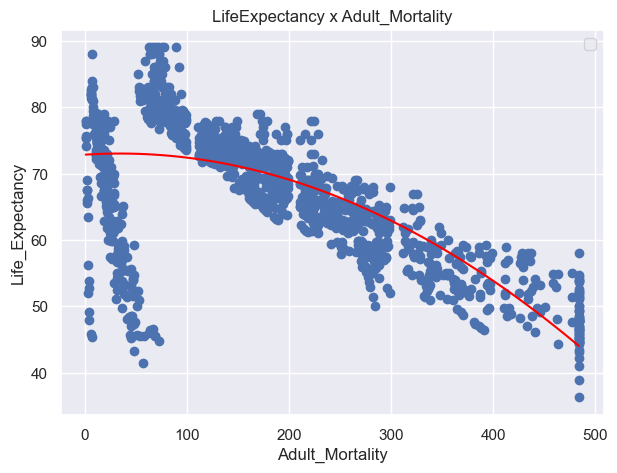

In [675]:
degree = 2  # Degree of the polynomial
coeffs = np.polyfit(train["winsorized_Adult_Mortality"], train["Life_Expectancy"], degree)
poly = np.poly1d(coeffs)

# Generate x values for the polynomial line
x = np.linspace(min(train["winsorized_Adult_Mortality"]), max(train["winsorized_Adult_Mortality"]), 100)
y_poly = poly(x)

# Scatter plot with polynomial curve
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy x Adult_Mortality")
plt.xlabel("Adult_Mortality", fontsize=12)
plt.ylabel("Life_Expectancy", fontsize=12)
plt.scatter(train["winsorized_Adult_Mortality"], train["Life_Expectancy"])
plt.plot(x, y_poly, color='red')
plt.legend()
plt.show()

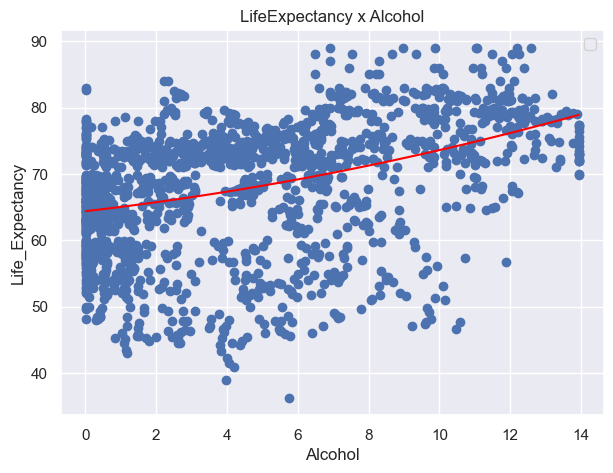

In [676]:
# Polynomial fit
degree = 2  # Degree of the polynomial
coeffs = np.polyfit(train["winsorized_Alcohol"], train["Life_Expectancy"], degree)
poly = np.poly1d(coeffs)

# Generate x values for the polynomial line
x = np.linspace(min(train["winsorized_Alcohol"]), max(train["winsorized_Alcohol"]), 100)
y_poly = poly(x)

# Scatter plot with polynomial curve
plt.figure(figsize=(7,5))
plt.title("LifeExpectancy x Alcohol")
plt.xlabel("Alcohol", fontsize=12)
plt.ylabel("Life_Expectancy", fontsize=12)
plt.scatter(train["winsorized_Alcohol"], train["Life_Expectancy"])
plt.plot(x, y_poly, color='red')
plt.legend()
plt.show()

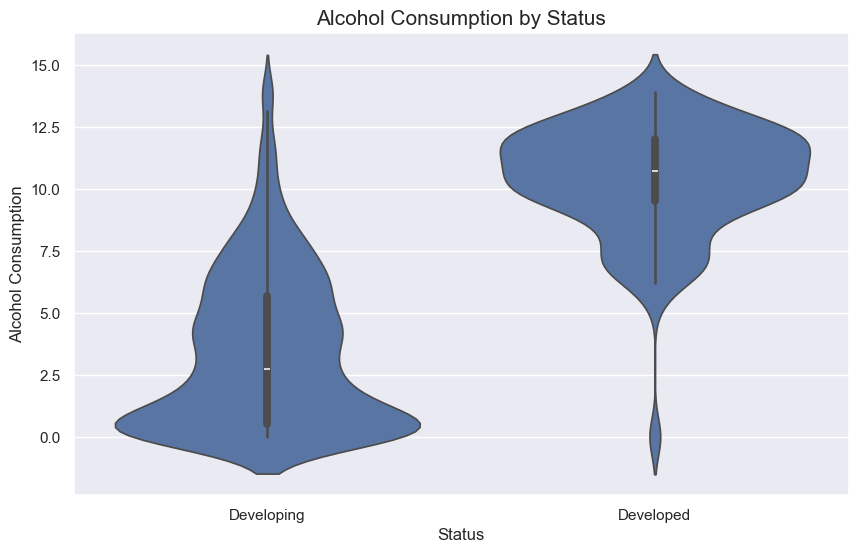

In [677]:
# Create the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Status', y='winsorized_Alcohol', data=train)
plt.xlabel("Status", fontsize=12)
plt.ylabel("Alcohol Consumption", fontsize=12)
plt.title("Alcohol Consumption by Status", fontsize=15)
plt.show()

# <font size="12"> 5. Treinamento dos modelos </font>

### 5.1 - Alguns ajustes necessários na base

In [678]:
train_win.head()

,Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_Population,winsorized_thinness_1to19_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Country,Year,Status
456,72.3,126.0,5.28,345.463714,96.000000,0,98.0,4.30,98.0,0.6,486438.0,8.1,0.602,11.9,Cabo Verde,2007,0
462,73.0,152.0,3.81,150.743486,79.454545,0,91.0,5.19,53.0,0.8,443716.0,9.4,0.562,11.0,Cabo Verde,2001,0
2667,74.9,13.0,1.29,594.645310,98.000000,3,98.0,7.26,98.0,0.1,1114558.0,6.4,0.720,14.7,Tunisia,2013,0
847,53.5,334.0,6.01,234.787421,32.000000,4,44.0,2.50,53.0,2.9,66647.0,1.4,0.542,8.2,Equatorial Guinea,2002,0
1987,59.6,321.0,0.59,124.378936,67.000000,14,62.0,6.79,68.0,1.4,61724.0,1.5,0.433,7.2,Papua New Guinea,2003,0


Remoção da variável categórica "Country" e da variável "Year", que possívelmente pode resultar em vazamento de dados, para utilização dos dados em modelos de ML

In [679]:
train_win = train_win.drop(columns=["Country"])

In [680]:
train_win = train_win.drop(columns=["Year"])

### 5.2 - Aplicando as mudanças na base de teste, baseadas nas mudanças feitas na base de treino

Primeiramente vamos aplicar na base de teste o mesmo tratamento realizado na base de treino

In [681]:
test.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy               2
Adult_Mortality               2
Infant_Deaths                 0
Alcohol                      36
Percentage_Exp                0
HepatitisB                  114
Measles                       0
BMI                           7
Under_Five_Deaths             0
Polio                         5
Total_Exp                    41
Diphtheria                    5
HIV/AIDS                      0
GDP                         103
Population                  136
thinness_1to19_years          7
thinness_5to9_years           7
Income_Comp_Of_Resources     36
Schooling                    34
dtype: int64

In [682]:
# Dictionary to store mean values from the train dataset
mean_values_by_country = {}

# Save the countries in a list
country_list = train.Country.unique()

# List of columns with missing values
list_miss = [
    'Life_Expectancy', 'Adult_Mortality', 'Alcohol', 'HepatitisB', 'BMI', 
    'Polio', 'Total_Exp', 'Diphtheria', 'GDP', 'Population', 
    'thinness_1to19_years', 'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'
]

# Calculate mean values for each country and column in the train dataset
for country in country_list:
    mean_values_by_country[country] = {}
    country_data = train[train['Country'] == country]
    for column in list_miss:
        mean_values_by_country[country][column] = country_data[column].mean(skipna=True)

# Fill missing values in the test dataset using the stored mean values
for country in test.Country.unique():
    if country in mean_values_by_country:  # Check if the country exists in the train dataset
        for column in list_miss:
            if column in test.columns:
                # Fill missing values in the test dataset with the mean from the train dataset
                test.loc[test['Country'] == country, column] = test.loc[test['Country'] == country, column].fillna(
                    mean_values_by_country[country][column]
                )


In [683]:
test.isnull().sum()

Country                       0
Year                          0
Status                        0
Life_Expectancy               2
Adult_Mortality               2
Infant_Deaths                 0
Alcohol                      13
Percentage_Exp                0
HepatitisB                   38
Measles                       0
BMI                           7
Under_Five_Deaths             0
Polio                         3
Total_Exp                    18
Diphtheria                    3
HIV/AIDS                      0
GDP                         101
Population                  136
thinness_1to19_years          7
thinness_5to9_years           7
Income_Comp_Of_Resources     36
Schooling                    34
dtype: int64

In [684]:
# Drop remaining null values after iteration.
test.dropna(inplace=True)

In [685]:
test.isnull().sum()

Country                     0
Year                        0
Status                      0
Life_Expectancy             0
Adult_Mortality             0
Infant_Deaths               0
Alcohol                     0
Percentage_Exp              0
HepatitisB                  0
Measles                     0
BMI                         0
Under_Five_Deaths           0
Polio                       0
Total_Exp                   0
Diphtheria                  0
HIV/AIDS                    0
GDP                         0
Population                  0
thinness_1to19_years        0
thinness_5to9_years         0
Income_Comp_Of_Resources    0
Schooling                   0
dtype: int64

Tratamento de outliers baseado na winsorization com os mesmos valores utilizados no treino

In [686]:
wins_test_Adult_Mortality = winsorize(test['Adult_Mortality'],(0,0.035))
wins_test_Infant_Deaths = winsorize(test['Infant_Deaths'],(0,0.105))
wins_test_Alcohol = winsorize(test['Alcohol'],(0,0.01))
wins_test_Percentage_Exp = winsorize(test['Percentage_Exp'],(0,0.12))
wins_test_HepatitisB = winsorize(test['HepatitisB'],(0.09,0))
wins_test_Measles = winsorize(test['Measles'],(0,0.19))
wins_test_Under_Five_Deaths = winsorize(test['Under_Five_Deaths'],(0,0.125))
wins_test_Polio = winsorize(test['Polio'],(0.085,0))
wins_test_Total_Exp = winsorize(test['Total_Exp'],(0,0.02))
wins_test_Diphtheria = winsorize(test['Diphtheria'],(0.12,0))
wins_test_HIV = winsorize(test['HIV/AIDS'],(0,0.16))
wins_test_GDP = winsorize(test['GDP'],(0,0.12))
wins_test_Population = winsorize(test['Population'],(0,0.125))
wins_test_thinness_1to19_years = winsorize(test['thinness_1to19_years'],(0,0.04))
wins_test_thinness_5to9_years = winsorize(test['thinness_5to9_years'],(0,0.04))
wins_test_Income_Comp_Of_Resources = winsorize(test['Income_Comp_Of_Resources'],(0.04,0))
wins_test_Schooling = winsorize(test['Schooling'],(0.02,0.01))

In [687]:
# Adding win_test variables to the test frame.
test['winsorized_Adult_Mortality'] = wins_test_Adult_Mortality
test['winsorized_Infant_Deaths'] = wins_test_Infant_Deaths
test['winsorized_Alcohol'] = wins_test_Alcohol
test['winsorized_Percentage_Exp'] = wins_test_Percentage_Exp
test['winsorized_HepatitisB'] = wins_test_HepatitisB
test['winsorized_Measles'] = wins_test_HepatitisB
test['winsorized_Under_Five_Deaths'] = wins_test_Under_Five_Deaths
test['winsorized_Polio'] = wins_test_Polio
test['winsorized_Total_Exp'] = wins_test_Total_Exp
test['winsorized_Diphtheria'] = wins_test_Diphtheria
test['winsorized_HIV'] = wins_test_HIV
test['winsorized_GDP'] = wins_test_GDP
test['winsorized_Population'] = wins_test_Population
test['winsorized_thinness_1to19_years'] = wins_test_thinness_1to19_years
test['winsorized_thinness_5to9_years'] = wins_test_thinness_5to9_years
test['winsorized_Income_Comp_Of_Resources'] = wins_test_Income_Comp_Of_Resources
test['winsorized_Schooling'] = wins_test_Schooling

In [688]:
# Remoção das variáveis que foram removidas no treino
columns_to_drop = [
    'winsorized_thinness_5to9_years', 'winsorized_GDP', 
    'winsorized_Infant_Deaths', 'winsorized_Measles', 
    'Country', 'Year'
]

# Drop the columns from the DataFrame
test = test.drop(columns=columns_to_drop)

# Verify the result
print(test.head())

          Status  Life_Expectancy  Adult_Mortality  Infant_Deaths  Alcohol  \
2546  Developing             73.7            123.0              8     0.97   
650    Developed             75.9            113.0              0    11.83   
1740  Developing             74.2            125.0              0     4.98   
1377  Developing             51.9            428.0             77     1.51   
535   Developing             49.6            394.0             46     0.45   

      Percentage_Exp  HepatitisB  Measles   BMI  Under_Five_Deaths  ...  \
2546      122.652333   83.000000      517  48.5                 10  ...   
650      1555.651986   96.142857        1  58.1                  0  ...   
1740      678.518894    9.000000        0  57.2                  0  ...   
1377        0.681686   66.000000    21002  14.4                121  ...   
535        49.091982   17.000000       63  16.4                 80  ...   

      winsorized_HepatitisB  winsorized_Under_Five_Deaths  winsorized_Polio  \
2

In [689]:
# Correlation of winsorized variables
columns_to_include = [1] + list(range(20, test.shape[1]))
test_win = test.iloc[:, columns_to_include]
# Na variável status, temos que transformar os valores categóricos em numérico, para que ela possa ser incluída em nosso teste.
test_win['Status'] = test['Status'].replace({'Developing': 0, 'Developed': 1})
test_win['Life_Expectancy'] = test['Life_Expectancy']
test_win.head()

,Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_Population,winsorized_thinness_1to19_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Status
2546,73.7,123.0,0.97,122.652333,83.000000,10,83.0,3.78,55.0,0.1,18914977.0,6.4,0.636,11.4,0
650,75.9,113.0,11.83,1275.877569,96.142857,0,96.0,6.95,96.0,0.1,444.0,1.8,0.783,13.9,1
1740,74.2,125.0,4.98,678.518894,27.000000,0,92.0,6.74,92.0,0.1,615875.0,2.1,0.762,13.6,0
1377,51.9,428.0,1.51,0.681686,66.000000,97,44.0,4.68,82.0,3.2,3145483.0,9.2,0.448,8.4,0
535,49.6,394.0,0.45,49.091982,27.000000,80,44.0,2.92,55.0,3.2,11133861.0,9.8,0.338,6.0,0


In [690]:
# Verificando se as duas tabelas estão iguais, que é necessário para que o treinamento funcione
train_win.head()

,Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Total_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_Population,winsorized_thinness_1to19_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,Status
456,72.3,126.0,5.28,345.463714,96.000000,0,98.0,4.30,98.0,0.6,486438.0,8.1,0.602,11.9,0
462,73.0,152.0,3.81,150.743486,79.454545,0,91.0,5.19,53.0,0.8,443716.0,9.4,0.562,11.0,0
2667,74.9,13.0,1.29,594.645310,98.000000,3,98.0,7.26,98.0,0.1,1114558.0,6.4,0.720,14.7,0
847,53.5,334.0,6.01,234.787421,32.000000,4,44.0,2.50,53.0,2.9,66647.0,1.4,0.542,8.2,0
1987,59.6,321.0,0.59,124.378936,67.000000,14,62.0,6.79,68.0,1.4,61724.0,1.5,0.433,7.2,0


### 5.3 - Treinando os modelos

In [691]:
# Verificando o tamanho das duas tabelas
print(f"train_win shape: {train_win.shape}")
print(f"test_win shape: {test_win.shape}")

train_win shape: (1706, 15)
test_win shape: (422, 15)


In [692]:
# Define the target variable
target = 'Life_Expectancy'  # Replace this with the name of your target variable if different

# Split features (X) and target (y) for train and test datasets
X_train = train_win.drop(columns=['Life_Expectancy'])  # All columns except the target
y_train = train_win[target]                # Only the target column

X_test = test_win.drop(columns=['Life_Expectancy'])   # All columns except the target
y_test = test_win[target]                  # Only the target column

# Check the shapes to confirm
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1706, 14)
y_train shape: (1706,)
X_test shape: (422, 14)
y_test shape: (422,)


In [693]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

# Assuming your data is already split:
# X_train, X_test, y_train, y_test

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
}

# Dictionary to store results
results = {}

In [694]:
# Fit and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    results[model_name] = {
        "R2 Score": r2,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
    }

In [695]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                             R2 Score  Mean Squared Error  Mean Absolute Error
Linear Regression            0.803981           17.517762             2.918338
SVR                         -0.094516           97.814315             7.762830
Random Forest Regressor      0.959669            3.604260             1.182488
Gradient Boosting Regressor  0.938546            5.491974             1.675647


In [696]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale features (X_train and X_test)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reinitialize SVR with scaled data
models["SVR"] = SVR()  # Keeping other models as they are

# Dictionary to store results
results = {}

# Fit and evaluate each model
for model_name, model in models.items():
    if model_name == "SVR":
        # Fit and predict using scaled features for SVR
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Fit and predict using original features for other models
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Store results
    results[model_name] = {
        "R2 Score": r2,
        "Mean Squared Error": mse,
        "Mean Absolute Error": mae,
    }


### 5.4 - Apresentação dos resultados

In [697]:
# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                             R2 Score  Mean Squared Error  Mean Absolute Error
Linear Regression            0.803981           17.517762             2.918338
SVR                          0.877819           10.919011             2.380997
Random Forest Regressor      0.959669            3.604260             1.182488
Gradient Boosting Regressor  0.938546            5.491974             1.675647


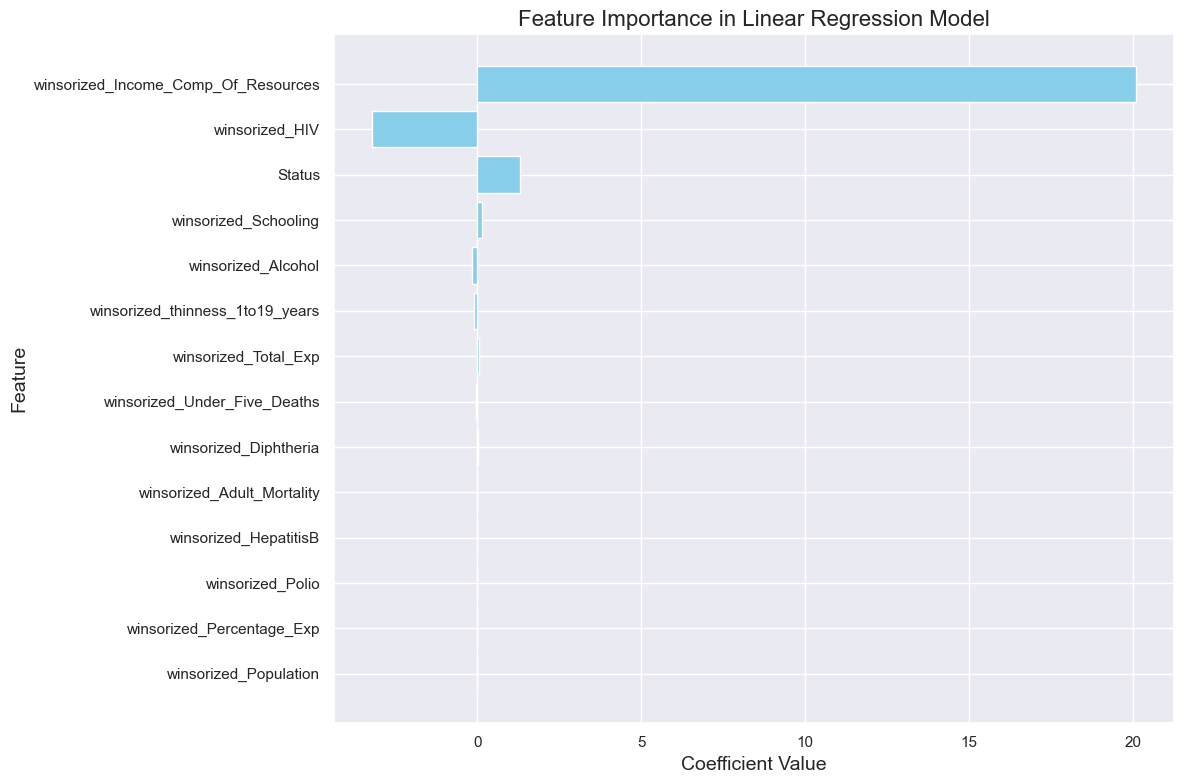

In [698]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model is already fitted
# Get feature names from X_train
feature_names = X_train.columns

# Get coefficients from the fitted model
coefficients = LinearRegression().fit(X_train, y_train).coef_

# Create a DataFrame to hold feature names and their corresponding coefficients
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefficients
})

# Sort the features by absolute importance
importance_df['Absolute Importance'] = np.abs(importance_df['Importance'])
importance_df = importance_df.sort_values(by='Absolute Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance in Linear Regression Model', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important at the top
plt.tight_layout()
plt.show()


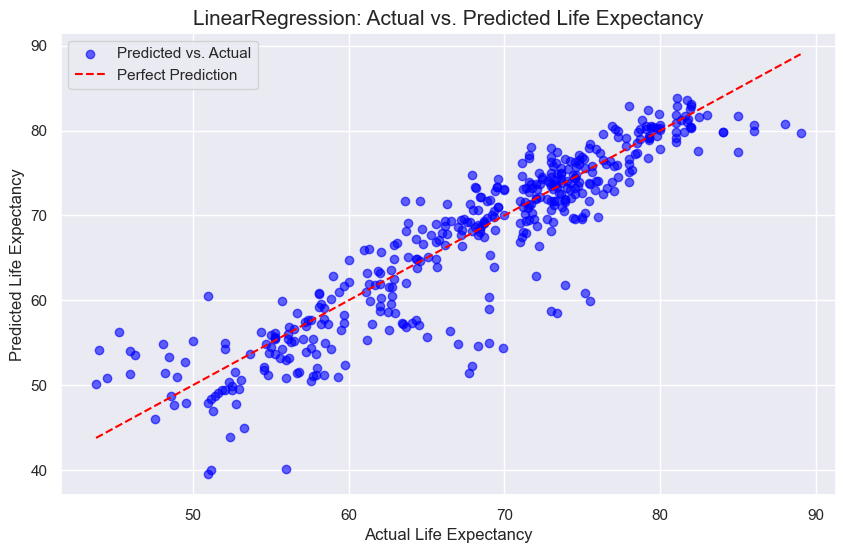

In [699]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Train the LinearRegression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel("Actual Life Expectancy", fontsize=12)
plt.ylabel("Predicted Life Expectancy", fontsize=12)
plt.title("LinearRegression: Actual vs. Predicted Life Expectancy", fontsize=15)
plt.legend()
plt.show()


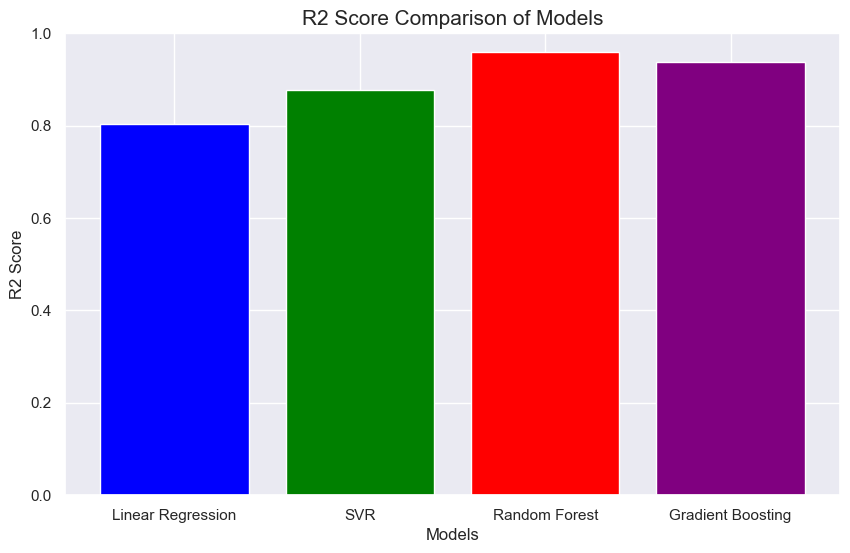

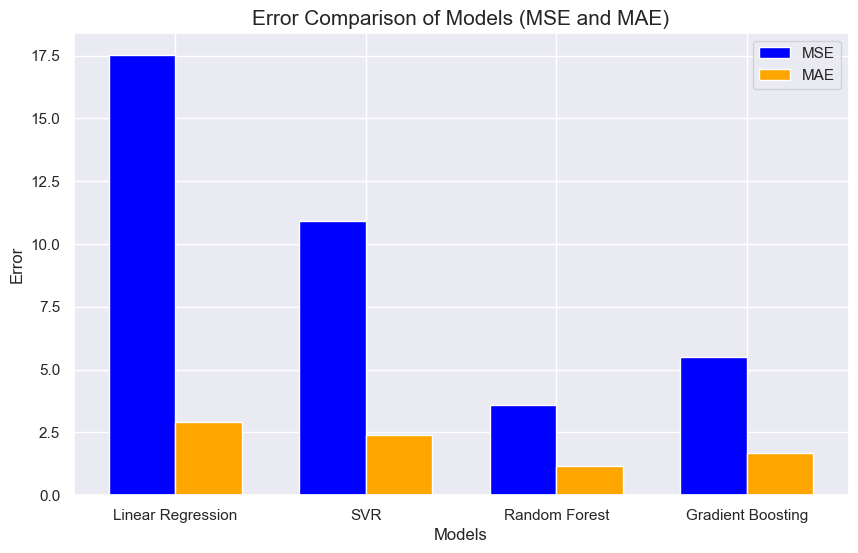

In [700]:
import matplotlib.pyplot as plt
import numpy as np

# Model results
models = ['Linear Regression', 'SVR', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.803981, 0.877819, 0.959669, 0.938546]
mse = [17.517762, 10.919011, 3.604260, 5.491974]
mae = [2.918338, 2.380997, 1.182488, 1.675647]

# Plot 1: R2 Scores
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Models', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('R2 Score Comparison of Models', fontsize=15)
plt.ylim(0, 1)
plt.show()

# Plot 2: MSE and MAE
bar_width = 0.35
index = np.arange(len(models))

plt.figure(figsize=(10, 6))
plt.bar(index, mse, bar_width, label='MSE', color='blue')
plt.bar(index + bar_width, mae, bar_width, label='MAE', color='orange')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Error', fontsize=12)
plt.title('Error Comparison of Models (MSE and MAE)', fontsize=15)
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.show()


### 5.4 - Comparação de train-test split com cross validation

In [701]:
from sklearn.model_selection import cross_val_score

# Assuming RandomForestClassifier, change this to the model you are using
model_cv_lr = LinearRegression()
model_tts_lr = LinearRegression()
model_tts_lr.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores_cv_lr = cross_val_score(model_cv_lr, X, y, cv=5)  # 5 is the number of folds
test_score_tts_lr = model_tts_lr.score(X_test, y_test)  # Or use any other metric like accuracy, f1-score, etc.
print(f"Train-test split test score for linear Regression: {test_score_tts_lr}")
print("Cross-validation scores for linear Regression:", cv_scores_cv_lr)
print("Average cross-validation score for linear Regression:", cv_scores_cv_lr.mean())

Train-test split test score for linear Regression: 0.8039809882397684
Cross-validation scores for linear Regression: [0.85814962 0.86898422 0.84594166 0.85082907 0.85355226]
Average cross-validation score for linear Regression: 0.8554913650862742


In [702]:
model_cv_svr = SVR()
model_tts_svr = SVR()
model_tts_svr.fit(X_train_scaled, y_train)

# Perform 5-fold cross-validation
cv_scores_cv_svr = cross_val_score(model_cv_svr, X_train_scaled, y_train, cv=5)  # 5 is the number of folds
test_score_tts_svr = model_tts_svr.score(X_test_scaled, y_test)  # Or use any other metric like accuracy, f1-score, etc.
print(f"Train-test split test score for SVR: {test_score_tts_svr}")
print("Average cross-validation score for SVR:", cv_scores_cv_svr.mean())

Train-test split test score for SVR: 0.8778192237820871
Average cross-validation score for SVR: 0.8559922324024167


In [703]:
model_cv_rf = RandomForestRegressor(random_state=42)
model_tts_rf = RandomForestRegressor(random_state=42)
model_tts_rf.fit(X_train, y_train)

# Perform 5-fold cross-validation
cv_scores_cv_rf = cross_val_score(model_cv_rf, X, y, cv=5)  # 5 is the number of folds
test_score_tts_rf = model_tts_rf.score(X_test, y_test)  # Or use any other metric like accuracy, f1-score, etc.
print(f"Train-test split test score for Random Forest Regressor: {test_score_tts_rf}")
print("Average cross-validation score for Random Forest Regressor:", cv_scores_cv_rf.mean())

Train-test split test score for Random Forest Regressor: 0.9596693011757088
Average cross-validation score for Random Forest Regressor: 0.9542301384888013


In [704]:
model_cv_gbr = GradientBoostingRegressor(random_state=42)
model_tts_gbr = GradientBoostingRegressor(random_state=42)
model_tts_gbr.fit(X_train, y_train)

# Pegbrorm 5-fold cross-validation
cv_scores_cv_gbr = cross_val_score(model_cv_gbr, X, y, cv=5)  # 5 is the number of folds
test_score_tts_gbr = model_tts_gbr.score(X_test, y_test)  # Or use any other metric like accuracy, f1-score, etc.
print(f"Train-test split test score for Gradient Boosting Regressor: {test_score_tts_gbr}")
print("Average cross-validation score for Gradient Boosting Regressor:", cv_scores_cv_gbr.mean())

Train-test split test score for Gradient Boosting Regressor: 0.9385462960799101
Average cross-validation score for Gradient Boosting Regressor: 0.9361726001465553
